In [1]:
# IMPORTING LIBRARIES

# General Libraries

import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from collections import Counter
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

# Preprocessing Libraries

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Machine Learning Libraries

import sklearn
import xgboost as xgb
from sklearn import tree
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from imblearn.pipeline import Pipeline
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import classification_report
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [2]:
# American data 
abank_data = pd.read_csv('american_bankruptcy.csv')

# Replace 'alive' with 0 and 'failed' with 1
data = abank_data['status_label'] = abank_data['status_label'].replace({'alive': 0, 'failed': 1})

abank_data = abank_data.drop('company_name', axis=1)

abank_data.head()

status_label  year       X1       X2      X3      X4       X5      X6   
0             0  1999  511.267  833.107  18.373  89.031  336.018  35.163  \
1             0  2000  485.856  713.811  18.577  64.367  320.590  18.531   
2             0  2001  436.656  526.477  22.496  27.207  286.588 -58.939   
3             0  2002  396.412  496.747  27.172  30.745  259.954 -12.410   
4             0  2003  432.204  523.302  26.680  47.491  247.245   3.504   

        X7        X8        X9      X10      X11     X12      X13      X14   
0  128.348  372.7519  1024.333  740.998  180.447  70.658  191.226  163.816  \
1  115.187  377.1180   874.255  701.854  179.987  45.790  160.444  125.392   
2   77.528  364.5928   638.721  710.199  217.699   4.711  112.244  150.464   
3   66.322  143.3295   606.337  686.621  164.658   3.573  109.590  203.575   
4  104.661  308.9071   651.958  709.292  248.666  20.811  128.656  131.261   

       X15       X16      X17      X18  
0  201.026  1024.333  401.483  935.302  
1  204.065   874.255  361.642  809.888  
2  139.603   638.721  399.964  611.514  
3  124.106   606.337  391.633  575.592  
4  131.884   651.958  407.608  604.467

In [3]:
# The classes are heavily skewed we need to solve this issue later.

print(abank_data['status_label'].value_counts())
print('-'* 30)
print('Non-Bankrupt: ', round(abank_data['status_label'].value_counts()[0]/len(abank_data) * 100,2), '% of the American dataset')
print('Bankrupt: ', round(abank_data['status_label'].value_counts()[1]/len(abank_data) * 100,2), '% of the American dataset')

status_label
0    73462
1     5220
Name: count, dtype: int64
------------------------------
Non-Bankrupt:  93.37 % of the American dataset
Bankrupt:  6.63 % of the American dataset


In [4]:
# Print First 5 records of American data
abank_data.head()

status_label  year       X1       X2      X3      X4       X5      X6   
0             0  1999  511.267  833.107  18.373  89.031  336.018  35.163  \
1             0  2000  485.856  713.811  18.577  64.367  320.590  18.531   
2             0  2001  436.656  526.477  22.496  27.207  286.588 -58.939   
3             0  2002  396.412  496.747  27.172  30.745  259.954 -12.410   
4             0  2003  432.204  523.302  26.680  47.491  247.245   3.504   

        X7        X8        X9      X10      X11     X12      X13      X14   
0  128.348  372.7519  1024.333  740.998  180.447  70.658  191.226  163.816  \
1  115.187  377.1180   874.255  701.854  179.987  45.790  160.444  125.392   
2   77.528  364.5928   638.721  710.199  217.699   4.711  112.244  150.464   
3   66.322  143.3295   606.337  686.621  164.658   3.573  109.590  203.575   
4  104.661  308.9071   651.958  709.292  248.666  20.811  128.656  131.261   

       X15       X16      X17      X18  
0  201.026  1024.333  401.483  935.302  
1  204.065   874.255  361.642  809.888  
2  139.603   638.721  399.964  611.514  
3  124.106   606.337  391.633  575.592  
4  131.884   651.958  407.608  604.467

# American Exploratory data analaysis [ EDA ]

In [5]:
abank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78682 entries, 0 to 78681
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status_label  78682 non-null  int64  
 1   year          78682 non-null  int64  
 2   X1            78682 non-null  float64
 3   X2            78682 non-null  float64
 4   X3            78682 non-null  float64
 5   X4            78682 non-null  float64
 6   X5            78682 non-null  float64
 7   X6            78682 non-null  float64
 8   X7            78682 non-null  float64
 9   X8            78682 non-null  float64
 10  X9            78682 non-null  float64
 11  X10           78682 non-null  float64
 12  X11           78682 non-null  float64
 13  X12           78682 non-null  float64
 14  X13           78682 non-null  float64
 15  X14           78682 non-null  float64
 16  X15           78682 non-null  float64
 17  X16           78682 non-null  float64
 18  X17           78682 non-nu

In [6]:
# looking for duplicate values
abank_data.duplicated().sum()

0

In [7]:
abank_data.describe()

status_label          year             X1             X2            X3   
count  78682.000000  78682.000000   78682.000000   78682.000000  78682.000000  \
mean       0.066343   2007.506317     880.362485    1594.529029    121.234256   
std        0.248882      5.742768    3928.564794    8930.484664    652.376804   
min        0.000000   1999.000000      -7.760000    -366.645000      0.000000   
25%        0.000000   2002.000000      18.924000      17.038250      1.192000   
50%        0.000000   2007.000000     100.449500     103.661000      7.929500   
75%        0.000000   2012.000000     431.526750     634.548000     47.971750   
max        1.000000   2018.000000  169662.000000  374623.000000  28430.000000   

                 X4            X5             X6            X7            X8   
count  78682.000000  78682.000000   78682.000000  78682.000000  7.868200e+04  \
mean     376.759424    201.605717     129.382453    286.832743  3.414355e+03   
std     2012.023142   1060.766096    1265.532022   1335.978571  1.841410e+04   
min   -21913.000000      0.000000  -98696.000000     -0.006000  1.000000e-04   
25%       -0.811000      0.000000      -7.415750      3.281250  3.498000e+01   
50%       15.034500      7.023000       1.616000     22.820000  2.275118e+02   
75%      139.655250     74.747250      40.144250    131.580500  1.244890e+03   
max    81730.000000  62567.000000  104821.000000  65812.000000  1.073391e+06   

                  X9            X10            X11           X12   
count   78682.000000   78682.000000   78682.000000  78682.000000  \
mean     2364.019706    2867.110620     722.483710    255.525035   
std     11950.068842   12917.944421    3242.170946   1494.643534   
min     -1964.999000       0.001000      -0.023000 -25913.000000   
25%        27.548500      37.363500       0.000000     -2.787000   
50%       186.598500     213.203500       7.593500      6.518000   
75%      1046.402500    1171.364750     248.760750     87.599000   
max    511729.000000  531864.000000  166250.000000  71230.000000   

                 X13            X14            X15            X16   
count   78682.000000   78682.000000   78682.000000   78682.000000  \
mean      769.490783     610.072255     532.467069    2364.019706   
std      3774.703114    2938.387443    6369.159440   11950.068842   
min    -21536.000000       0.001000 -102362.000000   -1964.999000   
25%         8.521250       8.889250     -68.282750      27.548500   
50%        63.581500      43.333000      -1.131000     186.598500   
75%       344.074250     222.817000     146.070000    1046.402500   
max    137106.000000  116866.000000  402089.000000  511729.000000   

                 X17            X18  
count   78682.000000   78682.000000  
mean     1773.563963    1987.260307  
std      8053.684902   10419.629038  
min         0.001000    -317.197000  
25%        13.486000      32.872500  
50%        81.988000     168.912000  
75%       629.975000     875.522250  
max    337980.000000  481580.000000

In [8]:
# numerical and categorical features 
numeric_features = abank_data.dtypes[abank_data.dtypes != 'int64'].index
categorical_features = abank_data.dtypes[abank_data.dtypes == 'int64'].index

cat = abank_data[categorical_features].columns.tolist()
num = abank_data[numeric_features].columns.tolist()

print('categorical features are', cat)

categorical features are ['status_label', 'year']


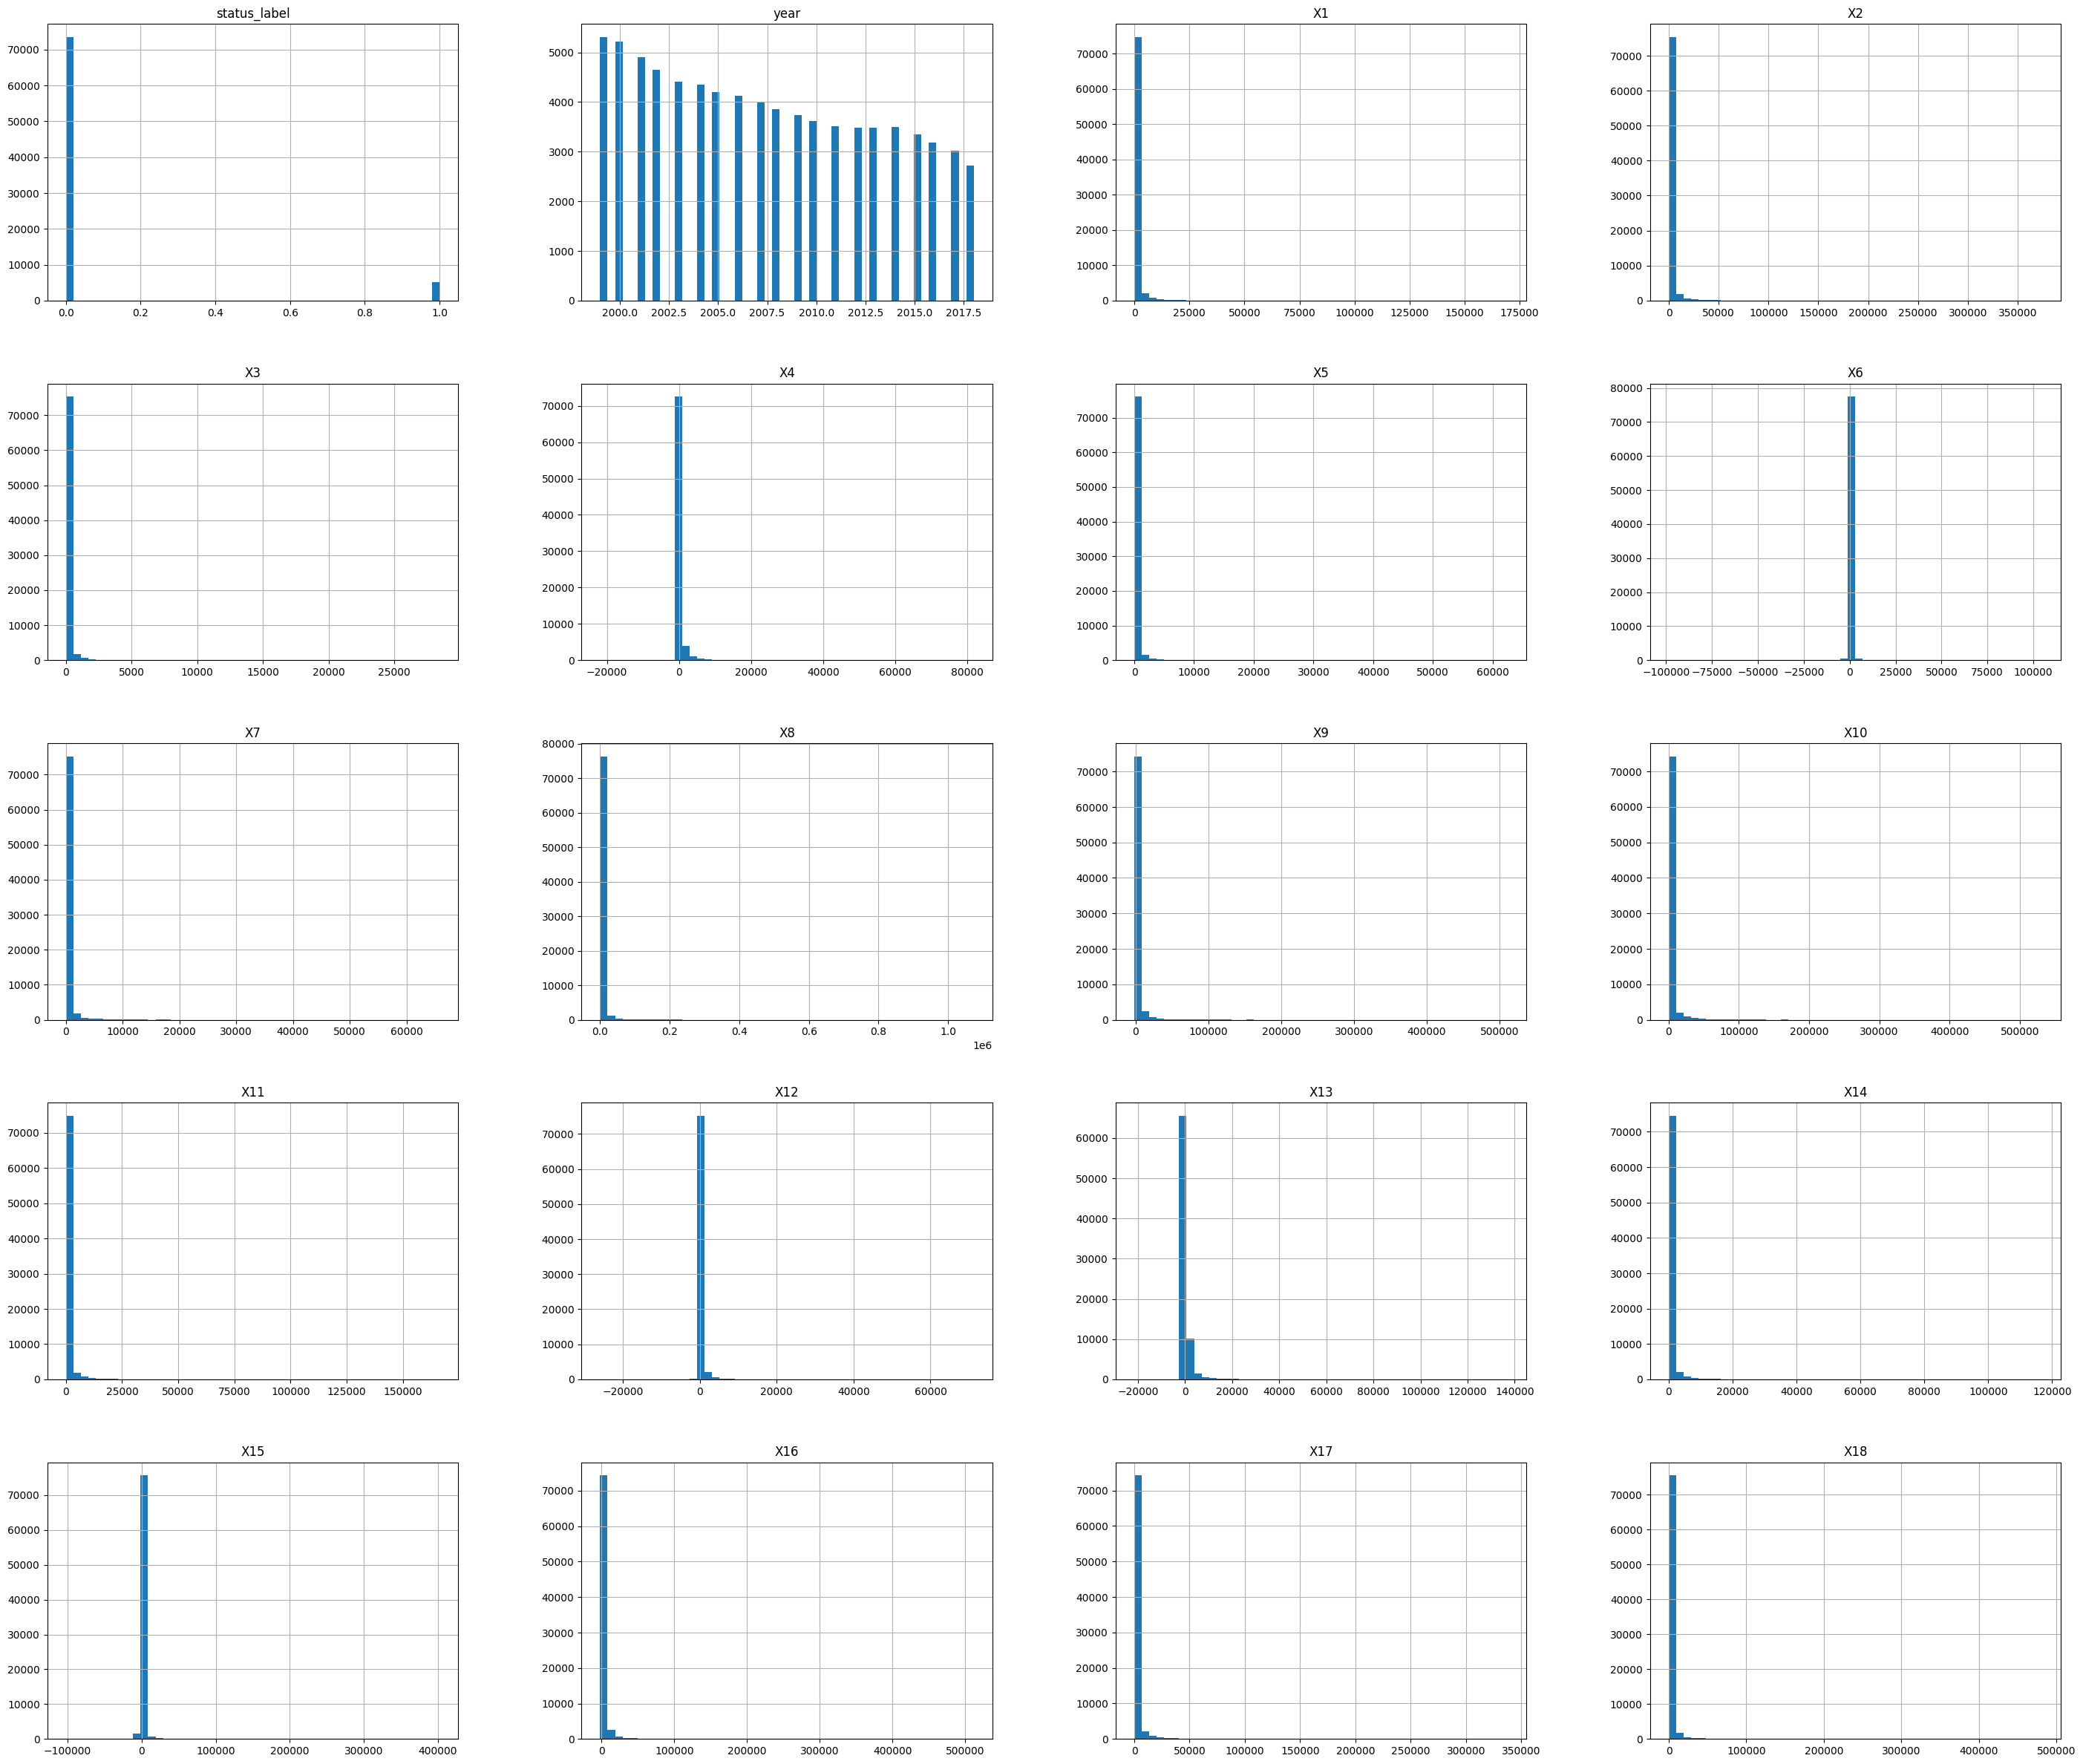

In [9]:
# histograms of numerical American data
abank_data.hist(figsize = (35,30), bins = 50)
plt.show()

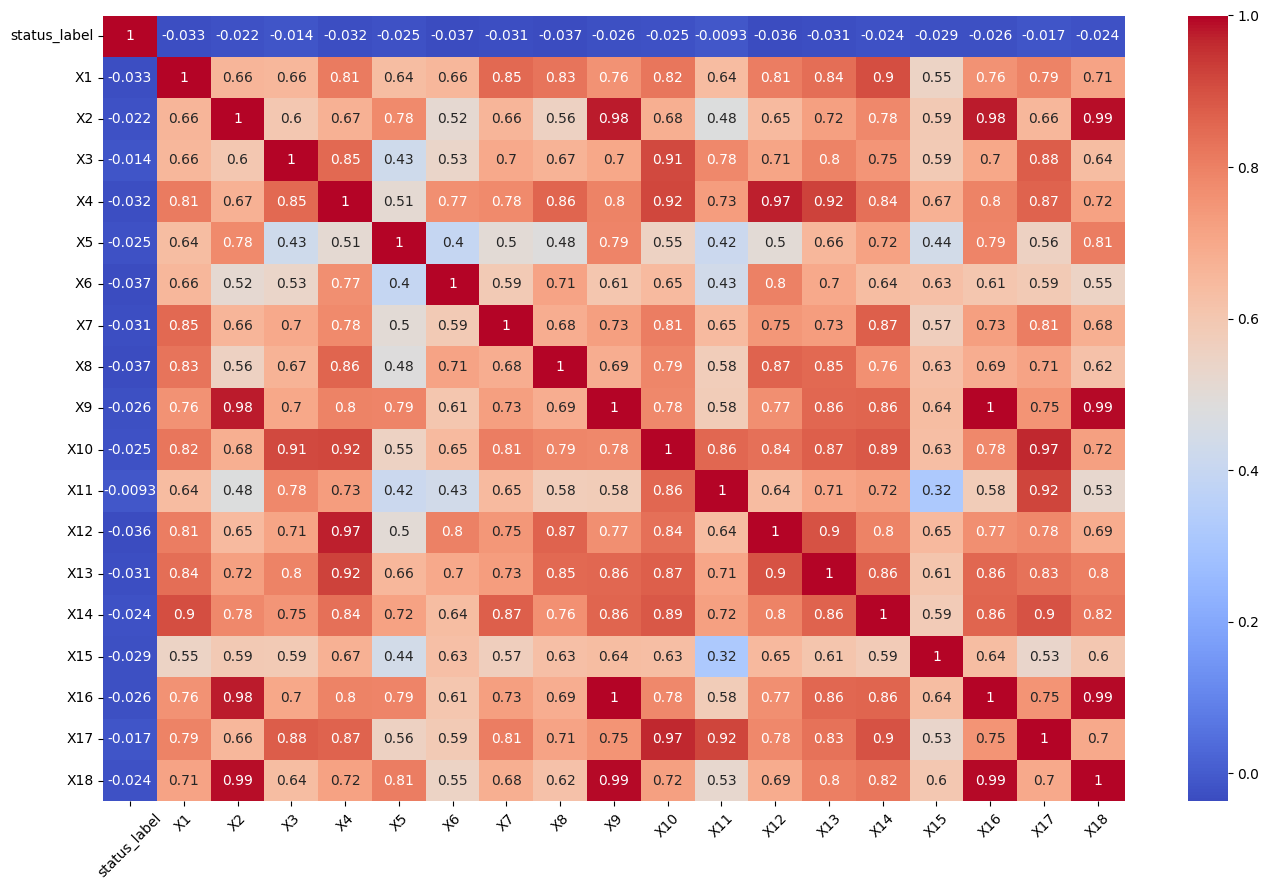

In [10]:
plt.figure(figsize=(14, 9))
sns.heatmap(abank_data.drop(["year"], axis=1).corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

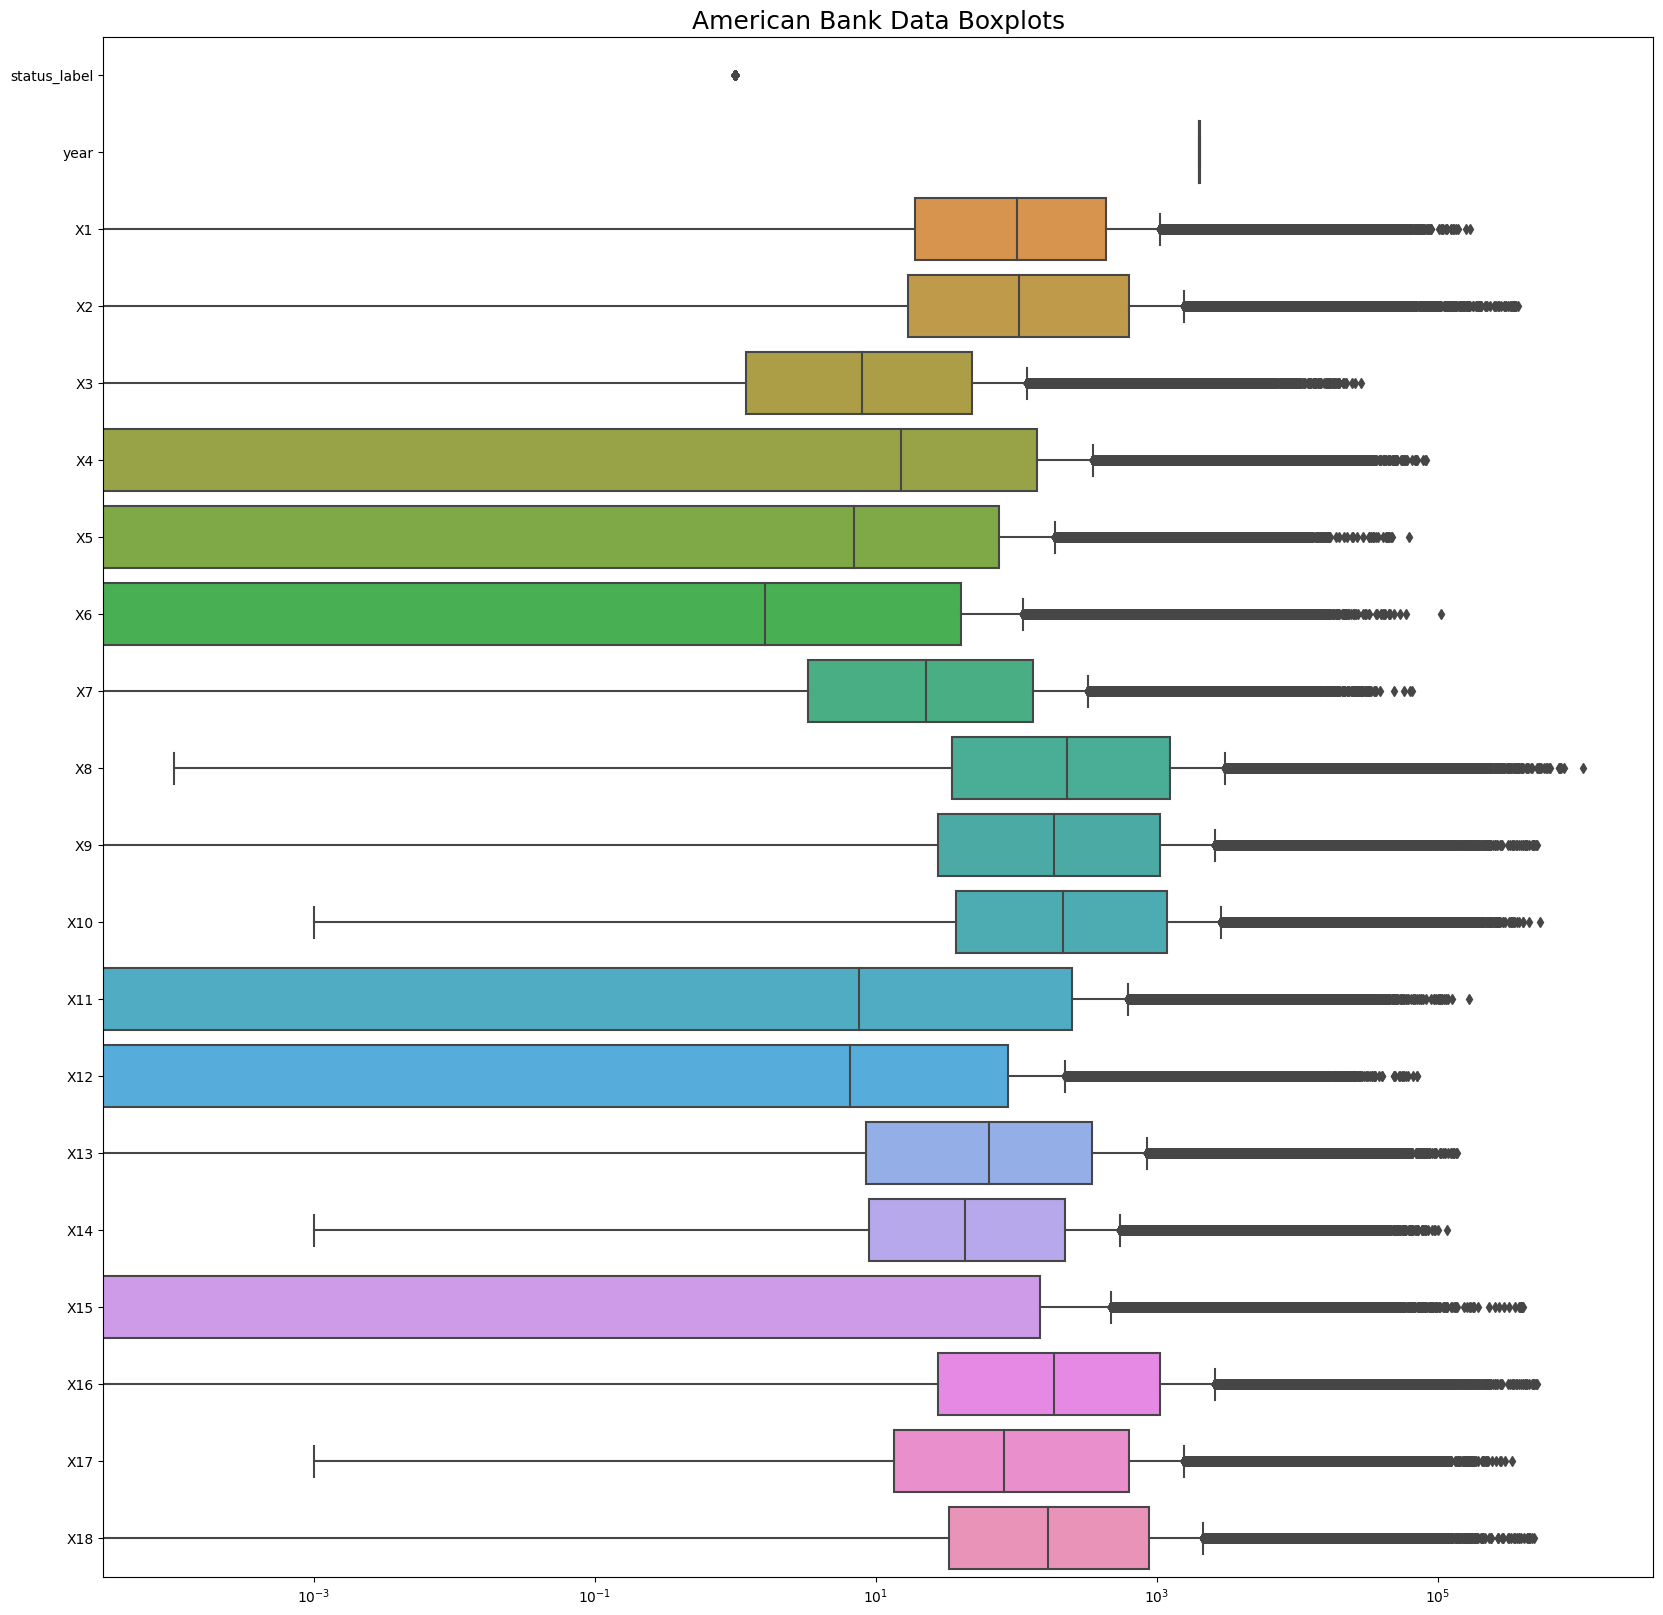

In [11]:
# Plot Boxplots of the numerical features

plt.figure(figsize = (20,20))
ax =sns.boxplot(data = abank_data, orient="h")
ax.set_title('American Bank Data Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

In [12]:
abank_data.columns

Index(['status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18'],
      dtype='object')

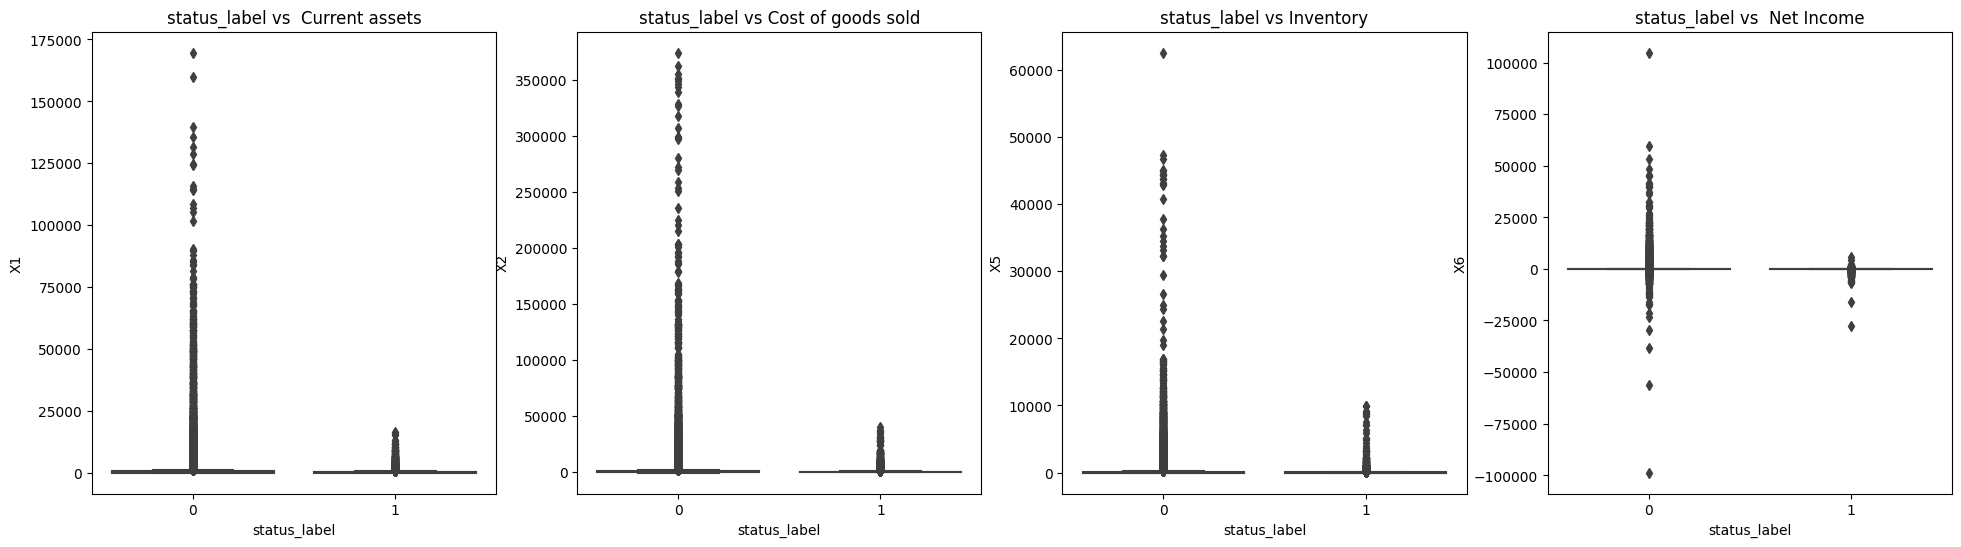

In [13]:
# Plotting other interesting features # abank data

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='status_label', y="X1", data=abank_data, ax=axes[0])
axes[0].set_title('status_label vs  Current assets')

sns.boxplot(x='status_label', y="X2", data=abank_data, ax=axes[1])
axes[1].set_title('status_label vs Cost of goods sold')


sns.boxplot(x='status_label', y="X5", data=abank_data, ax=axes[2])
axes[2].set_title('status_label vs Inventory')


sns.boxplot(x='status_label', y="X6", data=abank_data, ax=axes[3])
axes[3].set_title('status_label vs  Net Income')

plt.show()

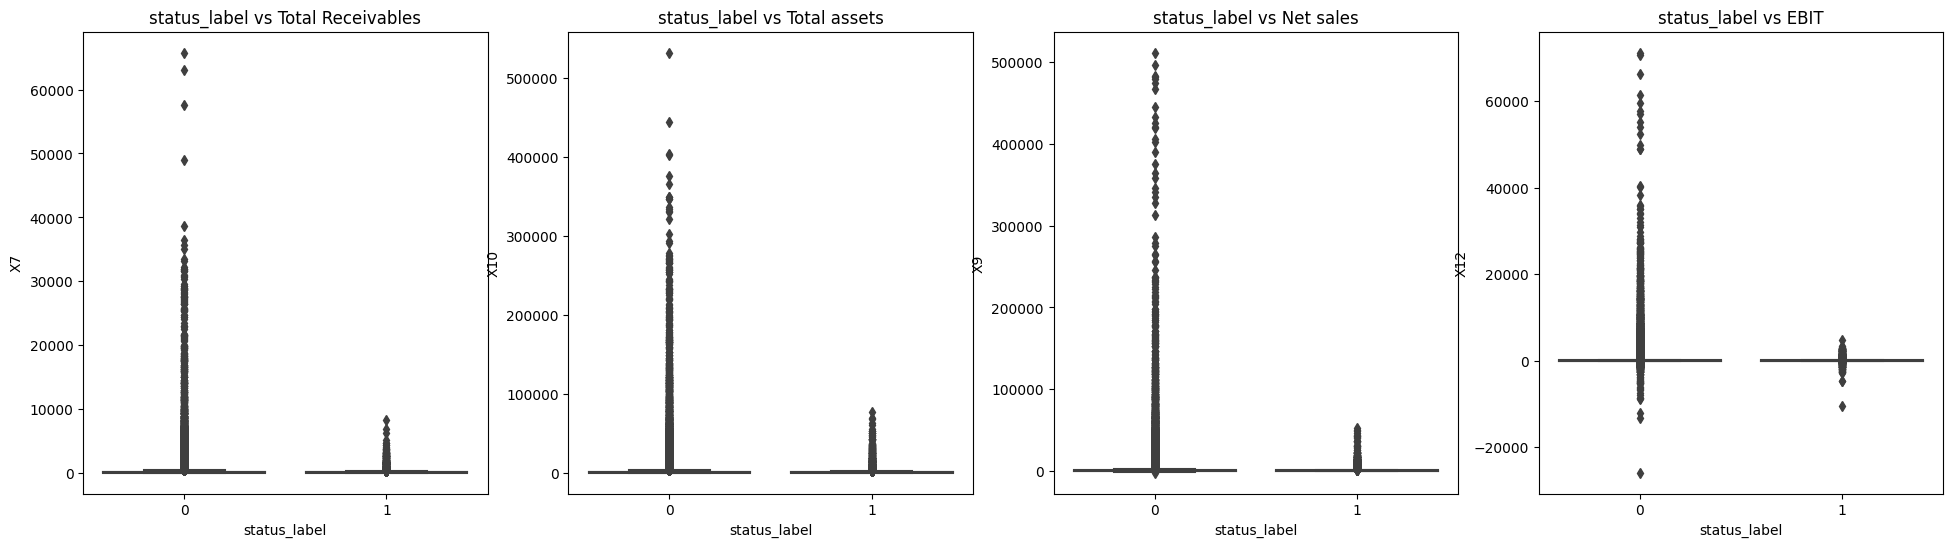

In [14]:
# Plotting other interesting features

f, axes = plt.subplots(ncols=4, figsize=(24,6))

sns.boxplot(x='status_label', y="X7", data=abank_data, ax=axes[0])
axes[0].set_title('status_label vs Total Receivables')

sns.boxplot(x='status_label', y="X10", data=abank_data, ax=axes[1])
axes[1].set_title('status_label vs Total assets')


sns.boxplot(x='status_label', y="X9", data=abank_data, ax=axes[2])
axes[2].set_title('status_label vs Net sales')


sns.boxplot(x='status_label', y="X12", data=abank_data, ax=axes[3])
axes[3].set_title('status_label vs EBIT')

plt.show()

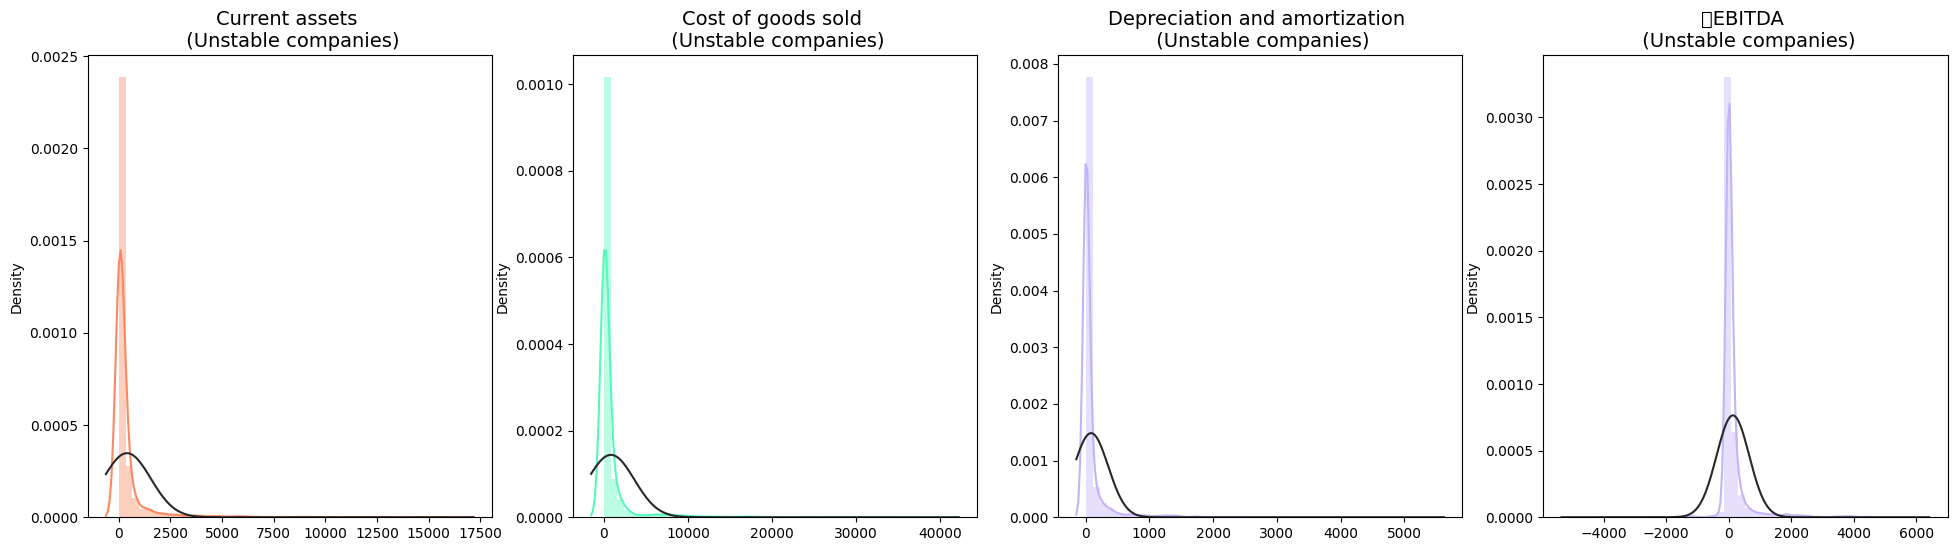

In [15]:
# Plotting the feature distributions for close to bankrputcy companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = abank_data['X1'].loc[abank_data['status_label'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Current assets \n (Unstable companies)', fontsize=14)

tot_debt_net = abank_data['X2'].loc[abank_data['status_label'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Cost of goods sold \n (Unstable companies)', fontsize=14)


debt_ratio = abank_data['X3'].loc[abank_data['status_label'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Depreciation and amortization \n (Unstable companies)', fontsize=14)

net_worth_assets = abank_data['X4'].loc[abank_data['status_label'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('	EBITDA \n (Unstable companies)', fontsize=14)

plt.show()

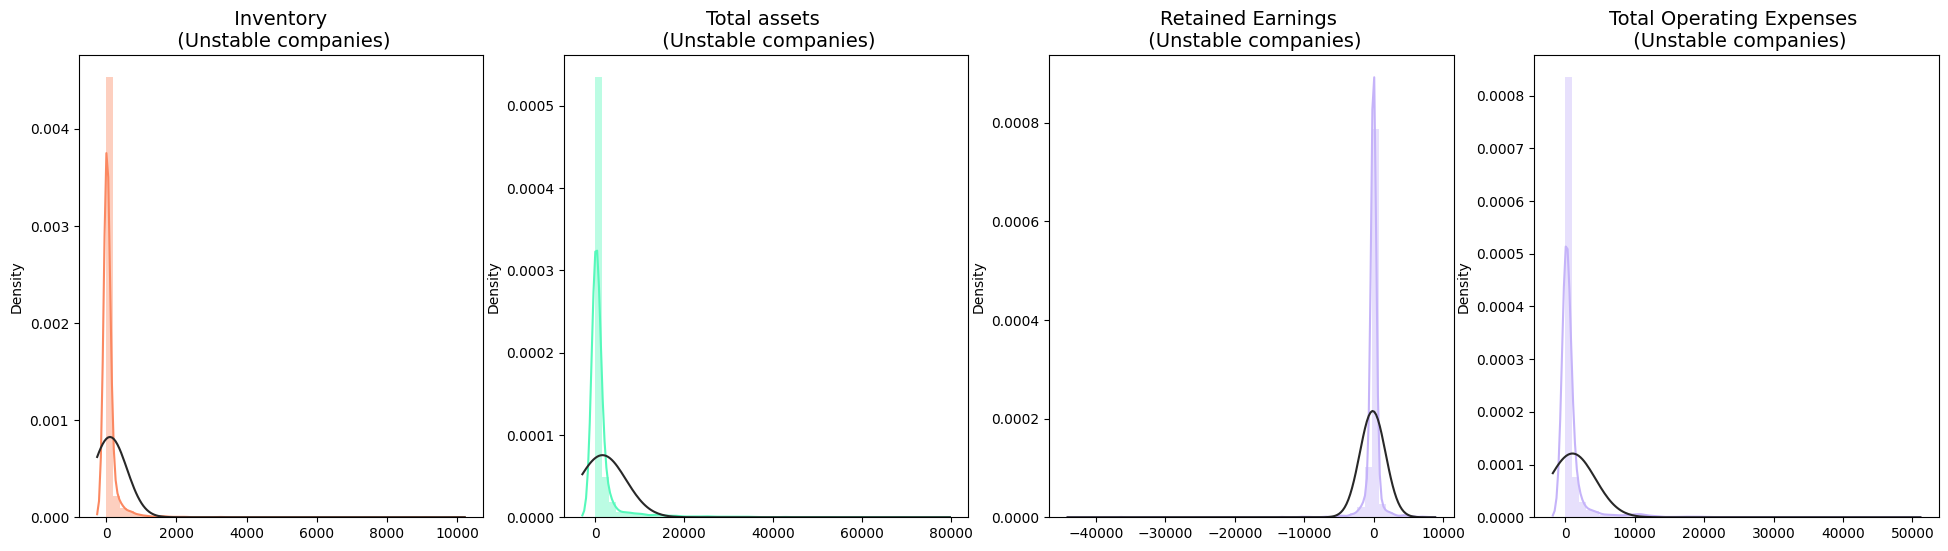

In [16]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = abank_data['X5'].loc[abank_data['status_label'] == 1].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title(' Inventory \n (Unstable companies)', fontsize=14)

tot_debt_net = abank_data['X10'].loc[abank_data['status_label'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Total assets \n (Unstable companies)', fontsize=14)


debt_ratio = abank_data['X15'].loc[abank_data['status_label'] == 1].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Retained Earnings \n (Unstable companies)', fontsize=14)

net_worth_assets = abank_data['X18'].loc[abank_data['status_label'] == 1].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('Total Operating Expenses \n (Unstable companies)', fontsize=14)

plt.show()

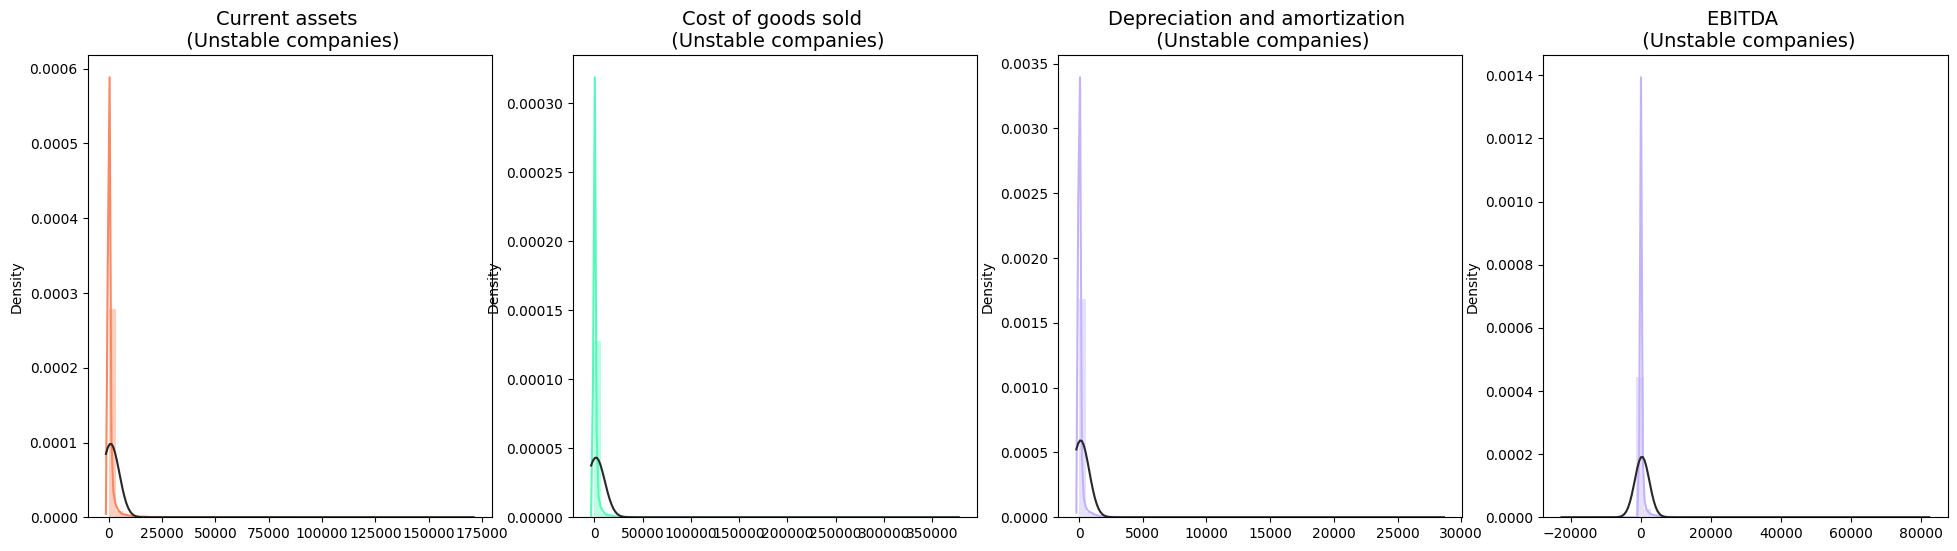

In [17]:
# Plotting the feature distributions for stable companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = abank_data['X1'].loc[abank_data['status_label'] == 0].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Current assets \n (Unstable companies)', fontsize=14)

tot_debt_net = abank_data['X2'].loc[abank_data['status_label'] == 0].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Cost of goods sold \n (Unstable companies)', fontsize=14)


debt_ratio = abank_data['X3'].loc[abank_data['status_label'] == 0].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Depreciation and amortization \n (Unstable companies)', fontsize=14)

net_worth_assets = abank_data['X4'].loc[abank_data['status_label'] == 0].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('EBITDA \n (Unstable companies)', fontsize=14)

plt.show()

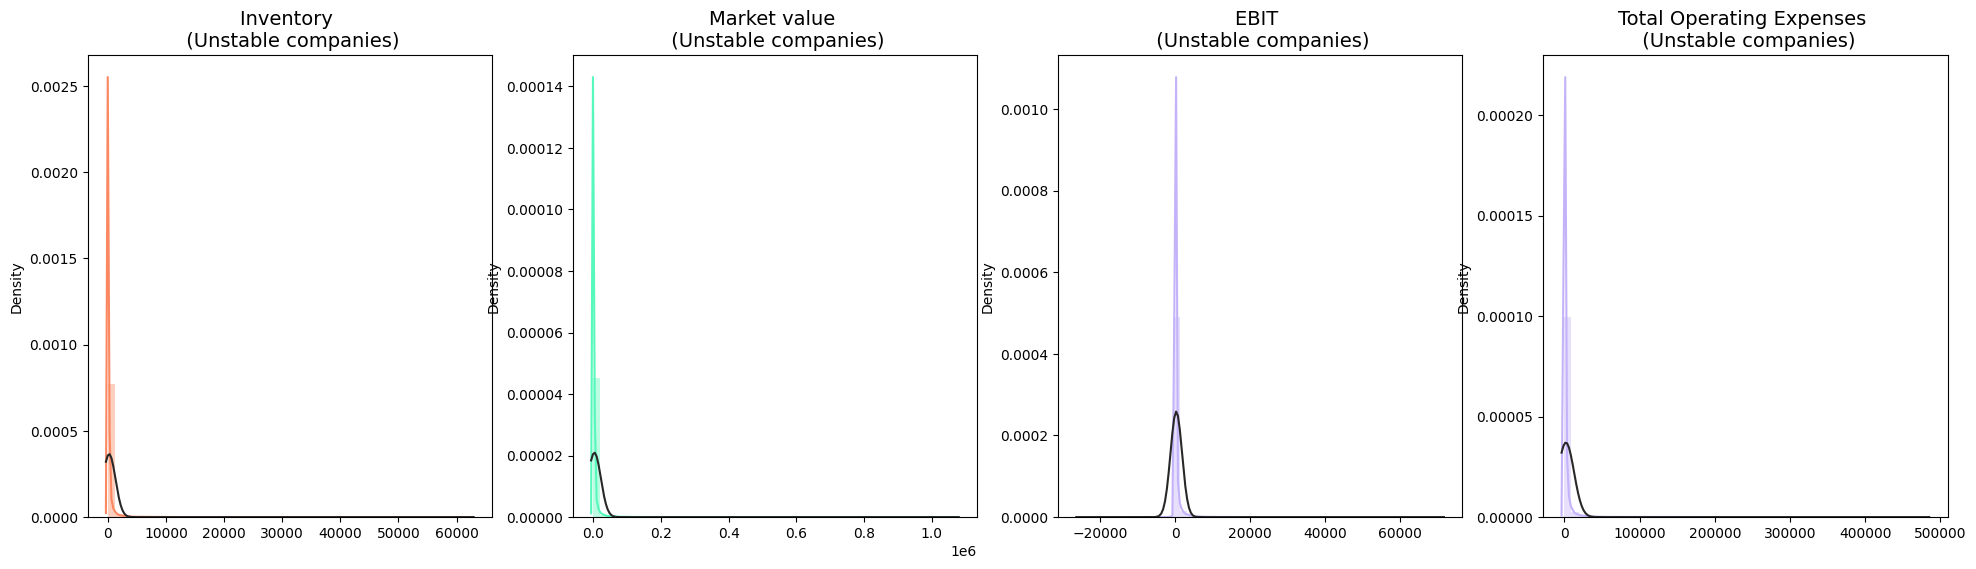

In [18]:
# Plotting the feature distributions for stable companies

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

cash_flow_rate = abank_data['X5'].loc[abank_data['status_label'] == 0].values
sns.distplot(cash_flow_rate,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Inventory \n (Unstable companies)', fontsize=14)

tot_debt_net = abank_data['X8'].loc[abank_data['status_label'] == 0].values
sns.distplot(tot_debt_net ,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Market value \n (Unstable companies)', fontsize=14)


debt_ratio = abank_data['X12'].loc[abank_data['status_label'] == 0].values
sns.distplot(debt_ratio,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('EBIT \n (Unstable companies)', fontsize=14)

net_worth_assets = abank_data['X18'].loc[abank_data['status_label'] == 0].values
sns.distplot(net_worth_assets,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('Total Operating Expenses \n (Unstable companies)', fontsize=14)

plt.show()

In [19]:
# finding positive and negative corealition with the target varaible

positive_corr = abank_data[numeric_features].corrwith(abank_data["status_label"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = abank_data[numeric_features].corrwith(abank_data["status_label"]).sort_values()[:6].index.tolist()

positive_corr = abank_data[positive_corr + ["status_label"]].copy()
negative_corr = abank_data[negative_corr + ["status_label"]].copy()

print(negative_corr)



            X6        X8      X12       X1       X4      X13  status_label
0       35.163  372.7519   70.658  511.267   89.031  191.226             0
1       18.531  377.1180   45.790  485.856   64.367  160.444             0
2      -58.939  364.5928    4.711  436.656   27.207  112.244             0
3      -12.410  143.3295    3.573  396.412   30.745  109.590             0
4        3.504  308.9071   20.811  432.204   47.491  128.656             0
...        ...       ...      ...      ...      ...      ...           ...
78677   25.261  756.4827   31.521  233.211   45.615   60.885             0
78678  129.688  527.5750  159.541  105.559  202.133  231.969             0
78679   -1.442  578.8868   13.994   63.971   79.051  100.784             0
78680  -20.401  412.6241    3.841  135.207   69.171   95.357             0
78681  -50.946  354.1786    2.061   82.589   67.262   91.696             0

[78682 rows x 7 columns]


In [20]:
print(positive_corr)

           X11      X3      X17       X2      X14      X18  status_label
0      180.447  18.373  401.483  833.107  163.816  935.302             0
1      179.987  18.577  361.642  713.811  125.392  809.888             0
2      217.699  22.496  399.964  526.477  150.464  611.514             0
3      164.658  27.172  391.633  496.747  203.575  575.592             0
4      248.666  26.680  407.608  523.302  131.261  604.467             0
...        ...     ...      ...      ...      ...      ...           ...
78677  184.666  14.094  225.887   43.338   28.197   58.608             0
78678  770.103  42.592  880.327   59.184   88.128   89.020             0
78679  683.985  65.057  770.233   69.074   85.765   90.807             0
78680  694.035  65.330  776.697   66.527   82.010   92.713             0
78681  632.122  65.201  712.687   68.817   79.365   93.251             0

[78682 rows x 7 columns]


In [21]:
abank_data.describe()

status_label          year             X1             X2            X3   
count  78682.000000  78682.000000   78682.000000   78682.000000  78682.000000  \
mean       0.066343   2007.506317     880.362485    1594.529029    121.234256   
std        0.248882      5.742768    3928.564794    8930.484664    652.376804   
min        0.000000   1999.000000      -7.760000    -366.645000      0.000000   
25%        0.000000   2002.000000      18.924000      17.038250      1.192000   
50%        0.000000   2007.000000     100.449500     103.661000      7.929500   
75%        0.000000   2012.000000     431.526750     634.548000     47.971750   
max        1.000000   2018.000000  169662.000000  374623.000000  28430.000000   

                 X4            X5             X6            X7            X8   
count  78682.000000  78682.000000   78682.000000  78682.000000  7.868200e+04  \
mean     376.759424    201.605717     129.382453    286.832743  3.414355e+03   
std     2012.023142   1060.766096    1265.532022   1335.978571  1.841410e+04   
min   -21913.000000      0.000000  -98696.000000     -0.006000  1.000000e-04   
25%       -0.811000      0.000000      -7.415750      3.281250  3.498000e+01   
50%       15.034500      7.023000       1.616000     22.820000  2.275118e+02   
75%      139.655250     74.747250      40.144250    131.580500  1.244890e+03   
max    81730.000000  62567.000000  104821.000000  65812.000000  1.073391e+06   

                  X9            X10            X11           X12   
count   78682.000000   78682.000000   78682.000000  78682.000000  \
mean     2364.019706    2867.110620     722.483710    255.525035   
std     11950.068842   12917.944421    3242.170946   1494.643534   
min     -1964.999000       0.001000      -0.023000 -25913.000000   
25%        27.548500      37.363500       0.000000     -2.787000   
50%       186.598500     213.203500       7.593500      6.518000   
75%      1046.402500    1171.364750     248.760750     87.599000   
max    511729.000000  531864.000000  166250.000000  71230.000000   

                 X13            X14            X15            X16   
count   78682.000000   78682.000000   78682.000000   78682.000000  \
mean      769.490783     610.072255     532.467069    2364.019706   
std      3774.703114    2938.387443    6369.159440   11950.068842   
min    -21536.000000       0.001000 -102362.000000   -1964.999000   
25%         8.521250       8.889250     -68.282750      27.548500   
50%        63.581500      43.333000      -1.131000     186.598500   
75%       344.074250     222.817000     146.070000    1046.402500   
max    137106.000000  116866.000000  402089.000000  511729.000000   

                 X17            X18  
count   78682.000000   78682.000000  
mean     1773.563963    1987.260307  
std      8053.684902   10419.629038  
min         0.001000    -317.197000  
25%        13.486000      32.872500  
50%        81.988000     168.912000  
75%       629.975000     875.522250  
max    337980.000000  481580.000000

In [22]:
# Outliers removal 

def outliers_removal(feature,feature_name,dataset):
    
    # Identify 25th & 75th quartiles

    q25, q75 = np.percentile(feature, 25), np.percentile(feature, 75)
    print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
    feat_iqr = q75 - q25
    print('iqr: {}'.format(feat_iqr))
    
    feat_cut_off = feat_iqr * 1.5
    feat_lower, feat_upper = q25 - feat_cut_off, q75 + feat_cut_off
    print('Cut Off: {}'.format(feat_cut_off))
    print(feature_name +' Lower: {}'.format(feat_lower))
    print(feature_name +' Upper: {}'.format(feat_upper))
    
    outliers = [x for x in feature if x < feat_lower or x > feat_upper]
    print(feature_name + ' outliers for close to bankruptcy cases: {}'.format(len(outliers)))
    #print(feature_name + ' outliers:{}'.format(outliers))

    dataset = dataset.drop(dataset[(dataset[feature_name] > feat_upper) | (dataset[feature_name] < feat_lower)].index)
    print('-' * 65)
    
    return dataset

for col in abank_data:
    abank_df = outliers_removal(abank_data[col],str(col),abank_data)

Quartile 25: 0.0 | Quartile 75: 0.0
iqr: 0.0
Cut Off: 0.0
status_label Lower: 0.0
status_label Upper: 0.0
status_label outliers for close to bankruptcy cases: 5220
-----------------------------------------------------------------
Quartile 25: 2002.0 | Quartile 75: 2012.0
iqr: 10.0
Cut Off: 15.0
year Lower: 1987.0
year Upper: 2027.0
year outliers for close to bankruptcy cases: 0
-----------------------------------------------------------------
Quartile 25: 18.924 | Quartile 75: 431.52675
iqr: 412.60275
Cut Off: 618.904125
X1 Lower: -599.980125
X1 Upper: 1050.430875
X1 outliers for close to bankruptcy cases: 10975
-----------------------------------------------------------------
Quartile 25: 17.03825 | Quartile 75: 634.548
iqr: 617.50975
Cut Off: 926.264625
X2 Lower: -909.2263750000001
X2 Upper: 1560.812625
X2 outliers for close to bankruptcy cases: 11594
-----------------------------------------------------------------
Quartile 25: 1.192 | Quartile 75: 47.97175
iqr: 46.77975
Cut Off: 70

In [23]:
# standardiseing features

numeric_features = abank_df.dtypes[abank_df.dtypes != 'int64'].index
abank_df[numeric_features] = abank_df[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))

abank_df[numeric_features] = abank_df[numeric_features].fillna(0)

In [24]:
abank_df.describe()

status_label          year            X1            X2            X3   
count  67468.000000  67468.000000  6.746800e+04  6.746800e+04  6.746800e+04  \
mean       0.070018   2007.216932 -2.527572e-17  1.095281e-17 -2.885645e-17   
std        0.255180      5.705838  1.000000e+00  1.000000e+00  1.000000e+00   
min        0.000000   1999.000000 -5.769936e-01 -1.618115e+00 -3.368038e-01   
25%        0.000000   2002.000000 -5.144563e-01 -6.019328e-01 -3.258902e-01   
50%        0.000000   2007.000000 -3.650812e-01 -4.662978e-01 -2.763164e-01   
75%        0.000000   2012.000000  9.491717e-02  1.302659e-01 -5.620342e-02   
max        1.000000   2018.000000  2.261370e+01  5.064246e+00  4.043776e+01   

                 X4            X5            X6            X7            X8   
count  6.746800e+04  6.746800e+04  6.746800e+04  6.746800e+04  6.746800e+04  \
mean   1.348039e-17 -8.256737e-17  4.633883e-18  4.718135e-17 -4.870843e-18   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.126191e+01 -4.374181e-01 -5.201369e+01 -5.229096e-01 -3.194077e-01   
25%   -3.474092e-01 -4.374181e-01 -8.879937e-02 -5.021889e-01 -3.084558e-01   
50%   -3.006968e-01 -3.945298e-01 -3.443096e-02 -3.962976e-01 -2.606450e-01   
75%   -4.968781e-03 -6.855486e-02  6.548907e-02  5.331777e-02 -5.651923e-02   
max    3.081295e+01  2.092038e+01  4.154012e+01  5.105712e+01  1.064062e+02   

                 X9           X10           X11           X12           X13   
count  6.746800e+04  6.746800e+04  6.746800e+04  6.746800e+04  6.746800e+04  \
mean   1.272211e-16  1.979932e-17  3.654448e-17  4.886640e-17  4.718135e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -3.986468e+00 -4.242016e-01 -2.912752e-01 -2.315884e+01 -7.293482e+00   
25%   -6.218367e-01 -4.035746e-01 -2.912331e-01 -2.793712e-01 -4.968574e-01   
50%   -4.680931e-01 -3.246798e-01 -2.859881e-01 -2.331583e-01 -3.847100e-01   
75%    1.809733e-01 -2.326731e-02 -1.417603e-01  1.129432e-02  8.212181e-02   
max    1.220656e+01  3.555054e+01  3.949564e+01  3.030024e+01  2.020362e+01   

                X14           X15           X16           X17           X18  
count  6.746800e+04  6.746800e+04  6.746800e+04  6.746800e+04  6.746800e+04  
mean   1.937806e-17 -4.212621e-19  1.272211e-16  1.209022e-16 -7.582717e-18  
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  
min   -4.408758e-01 -5.508234e+01 -3.986468e+00 -3.751020e-01 -1.369130e+00  
25%   -4.111118e-01 -3.700769e-02 -6.218367e-01 -3.632095e-01 -6.398795e-01  
50%   -3.214603e-01  1.725554e-02 -4.680931e-01 -3.188403e-01 -4.690612e-01  
75%    1.452998e-02  6.691445e-02  1.809733e-01 -7.246416e-02  1.930972e-01  
max    4.357490e+01  7.322576e+00  1.220656e+01  2.648747e+01  3.861916e+00

In [25]:
# finding positive and negative corealition with the target varaible

positive_corr = abank_df[numeric_features].corrwith(abank_df["status_label"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = abank_df[numeric_features].corrwith(abank_df["status_label"]).sort_values()[:6].index.tolist()

positive_corr = abank_df[positive_corr + ["status_label"]].copy()
negative_corr = abank_df[negative_corr + ["status_label"]].copy()

print(negative_corr)


             X6        X8       X12        X1       X13        X7   
0      0.172978 -0.162560  0.264976  0.903930  0.142860  0.637970  \
1      0.074047 -0.160723  0.083904  0.831426  0.036700  0.518937   
2     -0.386763 -0.165993 -0.215206  0.691045 -0.129531  0.178336   
3     -0.109997 -0.259097 -0.223492  0.576218 -0.138684  0.076985   
4     -0.015337 -0.189425 -0.097977  0.678342 -0.072930  0.423736   
...         ...       ...       ...       ...       ...       ...   
78677  0.114079 -0.001092 -0.019994  0.110562 -0.306657 -0.316228   
78678  0.735236 -0.097413  0.912163 -0.253664  0.283374 -0.028934   
78679 -0.044757 -0.075822 -0.147614 -0.372326 -0.169054 -0.138769   
78680 -0.157530 -0.145782 -0.221541 -0.169070 -0.187771 -0.276695   
78681 -0.339219 -0.170375 -0.234502 -0.319204 -0.200397 -0.108271   

       status_label  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
78677            

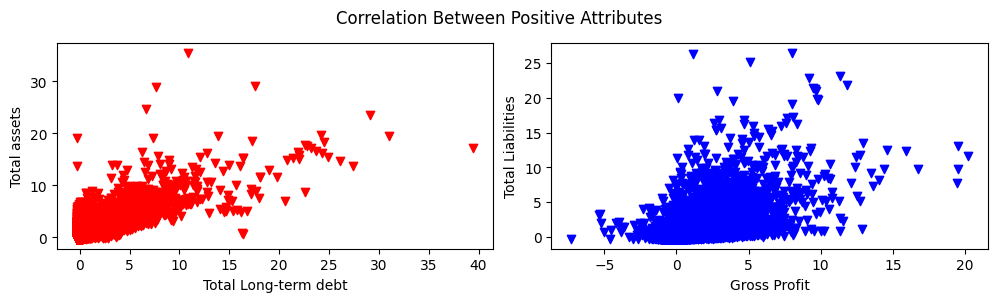

In [26]:
# plotting correlation between positive attributes 

plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel("Total Long-term debt")
plt.ylabel("Total assets")
plt.scatter(abank_df["X11"],abank_df["X10"], marker='v',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("Gross Profit")
plt.ylabel("Total Liabilities")
plt.scatter(abank_df["X13"],abank_df["X17"], marker='v',color = 'blue')

plt.tight_layout(pad=0.8)

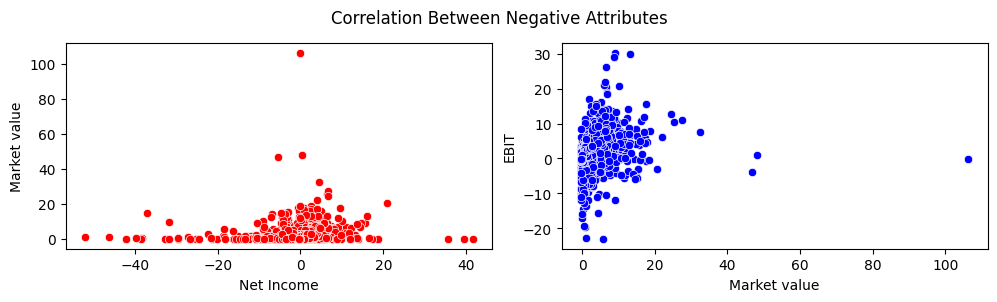

In [27]:
# plotting correlation between negative attributes 

plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("Net Income")
plt.ylabel("Market value")
sns.scatterplot(data=abank_df, x='X6', y='X8',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("Market value")
plt.ylabel("EBIT")
sns.scatterplot(data=abank_df, x='X8', y='X12',color = 'blue')

plt.tight_layout(pad=0.8)

# Resampling and data pre-processing of machine learning models

In [28]:
abank_df.columns

Index(['status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18'],
      dtype='object')

In [29]:
# Calculate the maximum of the difference between columns X9 and X16
max_diff = (abank_df["X9"] - abank_df["X16"]).max()
print(max_diff)

# Create a new column X19 as the difference between columns X18 and X2
abank_df["X19"] = abank_df["X18"] - abank_df["X2"]

#drop columns
abank_df = abank_df.drop(["X13", "X16", "X18", "X12"], axis=1)




0.0


In [30]:
abank_df.columns

Index(['status_label', 'year', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8',
       'X9', 'X10', 'X11', 'X14', 'X15', 'X17', 'X19'],
      dtype='object')

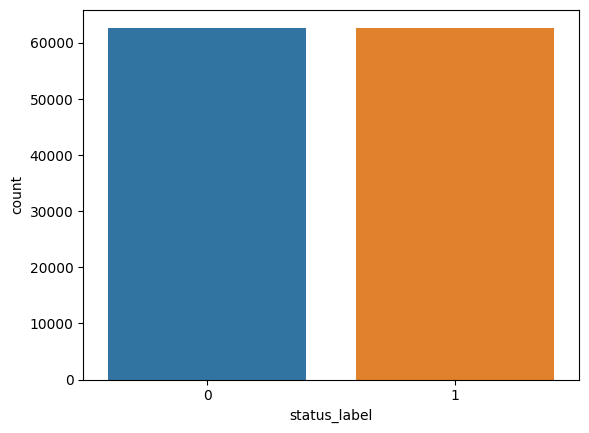

In [31]:
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Assuming you have your dataset loaded in abank_df

# Separate features and target variable
X = abank_df.drop(labels=['status_label'], axis=1)
y = abank_df['status_label']

# Perform SMOTE oversampling
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Visualize the balanced class distribution
sns.countplot(x=y_resampled)

# Create a DataFrame from the oversampled data
oversampled_data = pd.concat([pd.DataFrame(y_resampled, columns=['status_label']), pd.DataFrame(X_resampled, columns=X.columns)], axis=1)

# Save the oversampled data to a CSV file
as_bankdata = oversampled_data.to_csv('american_resampled_data.csv', index=False)


In [32]:
as_data = pd.read_csv('american_resampled_data.csv')
as_data.describe()

status_label           year             X1             X2   
count  125488.000000  125488.000000  125488.000000  125488.000000  \
mean        0.500000    2006.447063      -0.070710      -0.002112   
std         0.500002       5.337074       0.873894       0.979020   
min         0.000000    1999.000000      -0.576994      -1.618115   
25%         0.000000    2002.000000      -0.518388      -0.600381   
50%         0.500000    2006.000000      -0.383312      -0.455760   
75%         1.000000    2010.000000       0.011268       0.162972   
max         1.000000    2018.000000      22.613696       5.064246   

                  X3             X4             X5             X6   
count  125488.000000  125488.000000  125488.000000  125488.000000  \
mean        0.032949      -0.028129      -0.021157      -0.062170   
std         1.015802       0.967265       0.990390       0.959626   
min        -0.336804     -11.261907      -0.437418     -52.013690   
25%        -0.324661      -0.353605      -0.435958      -0.117956   
50%        -0.273870      -0.308741      -0.389074      -0.041979   
75%        -0.030612      -0.038050      -0.083642       0.026486   
max        40.437756      30.812948      20.920381      41.540118   

                  X7             X8             X9            X10   
count  125488.000000  125488.000000  125488.000000  125488.000000  \
mean       -0.052427      -0.074955      -0.028999      -0.008789   
std         0.896100       0.788589       0.946573       0.953011   
min        -0.522910      -0.319408      -3.986468      -0.424202   
25%        -0.503348      -0.308848      -0.624279      -0.404631   
50%        -0.410271      -0.272939      -0.468305      -0.325941   
75%        -0.017816      -0.129223       0.160215      -0.025497   
max        51.057117     106.406189      12.206561      35.550535   

                 X11            X14            X15            X17   
count  125488.000000  125488.000000  125488.000000  125488.000000  \
mean        0.050623      -0.016369      -0.017913       0.028201   
std         1.078121       0.957515       0.768650       1.027857   
min        -0.291275      -0.440876     -55.082345      -0.375102   
25%        -0.291073      -0.408551      -0.051944      -0.361813   
50%        -0.279602      -0.314643       0.010942      -0.311546   
75%        -0.076047      -0.001633       0.051540      -0.027011   
max        39.495640      43.574898       7.322576      26.487468   

                 X19  
count  125488.000000  
mean       -0.023526  
std         0.259687  
min        -1.232087  
25%        -0.073468  
50%        -0.050151  
75%        -0.001209  
max         3.868306

In [33]:
# The classes are heavily skewed we need to solve this issue later.

print(as_data['status_label'].value_counts())
print('-'* 30)
print('Non-Bankrupt: ', round(as_data['status_label'].value_counts()[0]/len(as_data) * 100,2), '% of the American resampled dataset')
print('Bankrupt: ', round(as_data['status_label'].value_counts()[1]/len(as_data) * 100,2), '% of the American resampled dataset')

status_label
0    62744
1    62744
Name: count, dtype: int64
------------------------------
Non-Bankrupt:  50.0 % of the American resampled dataset
Bankrupt:  50.0 % of the American resampled dataset


# Machine learning model implemenations without Feature engineeirng

In [34]:
as_data.head()

status_label  year        X1        X2        X3        X4        X5   
0             0  1999  0.903930  1.599242 -0.103917  0.156509  3.455928  \
1             0  2000  0.831426  1.279328 -0.101331  0.019589  3.277168   
2             0  2001  0.691045  0.776957 -0.051656 -0.186701  2.883197   
3             0  2002  0.576218  0.697231  0.007614 -0.167060  2.574596   
4             0  2003  0.678342  0.768443  0.001378 -0.074096  2.427340   

         X6        X7        X8        X9       X10       X11       X14   
0  0.172978  0.637970 -0.162560  1.081198  0.124989  0.039806  0.264432  \
1  0.074047  0.518937 -0.160723  0.826778  0.095978  0.038962  0.098997   
2 -0.386763  0.178336 -0.165993  0.427489  0.102163  0.108147  0.206944   
3 -0.109997  0.076985 -0.259097  0.372590  0.084688  0.010840  0.435614   
4 -0.015337  0.423736 -0.189425  0.449929  0.101490  0.164957  0.124266   

        X15       X17       X19  
0  0.181936  0.092909 -0.301077  
1  0.184346  0.046466 -0.248242  
2  0.133232  0.091138 -0.168324  
3  0.120944  0.081426 -0.165096  
4  0.127112  0.100049 -0.174817

In [35]:
df = as_data
df_train = df[df['year'] < 2016]
df_test = df[df['year'] >= 2016]

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116845 entries, 0 to 125487
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status_label  116845 non-null  int64  
 1   year          116845 non-null  int64  
 2   X1            116845 non-null  float64
 3   X2            116845 non-null  float64
 4   X3            116845 non-null  float64
 5   X4            116845 non-null  float64
 6   X5            116845 non-null  float64
 7   X6            116845 non-null  float64
 8   X7            116845 non-null  float64
 9   X8            116845 non-null  float64
 10  X9            116845 non-null  float64
 11  X10           116845 non-null  float64
 12  X11           116845 non-null  float64
 13  X14           116845 non-null  float64
 14  X15           116845 non-null  float64
 15  X17           116845 non-null  float64
 16  X19           116845 non-null  float64
dtypes: float64(15), int64(2)
memory usage: 16.0 MB


In [36]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8643 entries, 17 to 125469
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   status_label  8643 non-null   int64  
 1   year          8643 non-null   int64  
 2   X1            8643 non-null   float64
 3   X2            8643 non-null   float64
 4   X3            8643 non-null   float64
 5   X4            8643 non-null   float64
 6   X5            8643 non-null   float64
 7   X6            8643 non-null   float64
 8   X7            8643 non-null   float64
 9   X8            8643 non-null   float64
 10  X9            8643 non-null   float64
 11  X10           8643 non-null   float64
 12  X11           8643 non-null   float64
 13  X14           8643 non-null   float64
 14  X15           8643 non-null   float64
 15  X17           8643 non-null   float64
 16  X19           8643 non-null   float64
dtypes: float64(15), int64(2)
memory usage: 1.2 MB


In [39]:
# without hypp
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, f1_score
import matplotlib.pyplot as plt
import pandas as pd


# Load your data
df = as_data
df_train = df[df['year'] < 2016]
df_test = df[df['year'] >= 2016]

# Separate features (X) and target variable (y)
X_train = df_train.drop(['status_label'], axis=1)
y_train = df_train['status_label']

X_test = df_test.drop(['status_label'], axis=1)
y_test = df_test['status_label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features (not required for all models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the models without hyperparameter tuning
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Not Bankrupt', 'Bankrupt'], output_dict=True)
    results[name] = {'F1 Score': f1, 'Classification Report': report}

# Evaluate and compare the models using F1 score
for model_name, metrics in results.items():
    print(f'Model: {model_name}')
    print(f'F1 Score: {metrics["F1 Score"]:.2f}')
    print('Classification Report:')
    print(metrics['Classification Report'])



Model: Decision Tree
F1 Score: 0.86
Classification Report:
{'Not Bankrupt': {'precision': 0.8708223807735637, 'recall': 0.822632139056403, 'f1-score': 0.8460415906603429, 'support': 11276}, 'Bankrupt': {'precision': 0.8427302036643862, 'recall': 0.8862151657983958, 'f1-score': 0.8639258363563078, 'support': 12093}, 'accuracy': 0.8555351106166289, 'macro avg': {'precision': 0.856776292218975, 'recall': 0.8544236524273994, 'f1-score': 0.8549837135083254, 'support': 23369}, 'weighted avg': {'precision': 0.8562852290862307, 'recall': 0.8555351106166289, 'f1-score': 0.8552963376842337, 'support': 23369}}
Model: Random Forest
F1 Score: 0.95
Classification Report:
{'Not Bankrupt': {'precision': 0.960084808259587, 'recall': 0.9236431358637814, 'f1-score': 0.9415114807448924, 'support': 11276}, 'Bankrupt': {'precision': 0.9312355243191438, 'recall': 0.9641941619118498, 'f1-score': 0.9474282928414723, 'support': 12093}, 'accuracy': 0.9446274979673926, 'macro avg': {'precision': 0.945660166289365

XGBoost ROC-AUC: 0.93


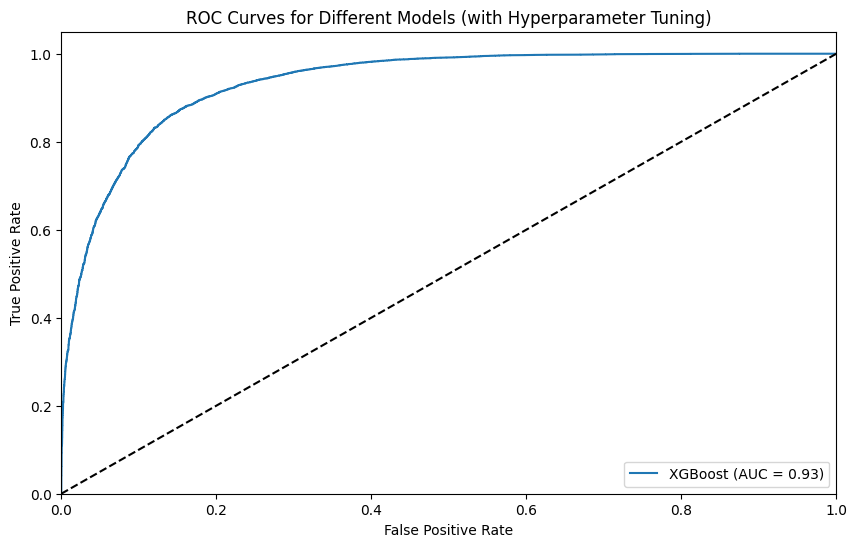

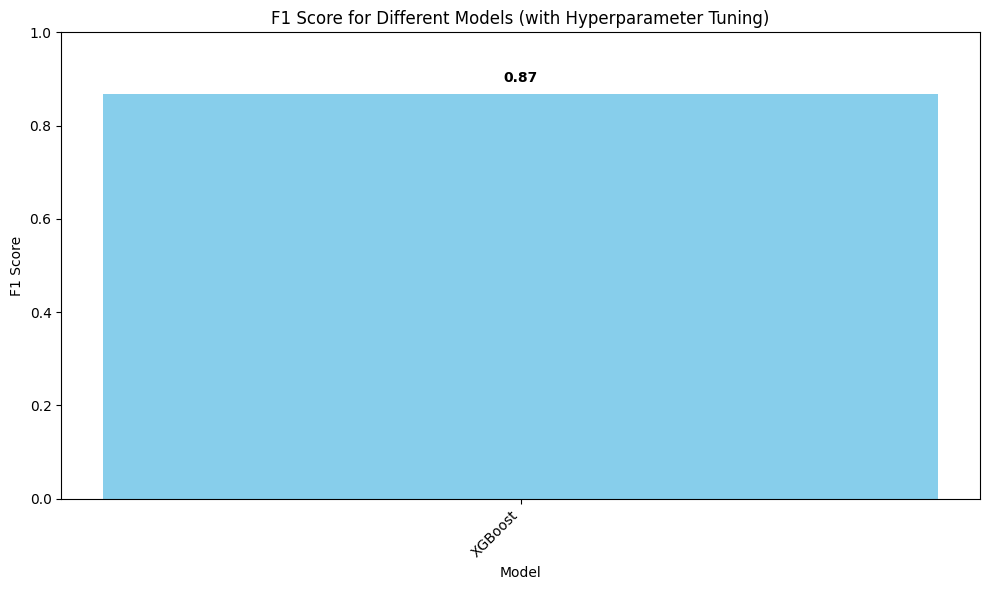

In [41]:
# models with hyperparameter tuning
from sklearn.model_selection import GridSearchCV


# Load your data
df = as_data
df_train = df[df['year'] < 2016]
df_test = df[df['year'] >= 2016]

# Separating features (X) and target variable (y)
X_train = df_train.drop(['status_label'], axis=1)
y_train = df_train['status_label']

X_test = df_test.drop(['status_label'], axis=1)
y_test = df_test['status_label']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initializing and train the models with hyperparameter tuning using GridSearchCV
models = {
    'XGBoost': (XGBClassifier(), {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}),
}

roc_auc_scores = {}
f1_scores = {}

plt.figure(figsize=(10, 6))

for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    roc_auc_scores[name] = roc_auc
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models (with Hyperparameter Tuning)')
plt.legend(loc="lower right")

# Print ROC-AUC scores
for model_name, roc_auc in roc_auc_scores.items():
    print(f'{model_name} ROC-AUC: {roc_auc:.2f}')

# Evaluate and compare the models
for model_name, (model, _) in models.items():
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores[model_name] = f1

# Bar plot for F1 scores
plt.figure(figsize=(10, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Models (with Hyperparameter Tuning)')
plt.ylim(0, 1)  # Set the y-axis range (0 to 1)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability

# Add labels to the bars
for model_name, f1 in f1_scores.items():
    plt.text(model_name, f1 + 0.02, f"{f1:.2f}", ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()




# Plotting important Features using PCA

In [43]:
from sklearn.decomposition import PCA
import plotly.express as px

def preprocess_inputs(df):
    df = df.copy()
    
    df_train = df[df['year'] < 2016]
    df_test = df[df['year'] >= 2016]

    # Separate features (X) and target variable (y)
    X_train = df_train.drop(['status_label'], axis=1)
    y_train = df_train['status_label']

    X_test = df_test.drop(['status_label'], axis=1)
    y_test = df_test['status_label']

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Standardize the features (not required for all models)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test


In [44]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Load your data into a DataFrame (replace 'your_data.csv' with your file)
data = as_data

# Preprocess your data
X_train, X_test, y_train, y_test = preprocess_inputs(data)

# Number of principal components to retain
n_components = 10

# Perform PCA
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)

# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Get the names of the original features from the preprocessed data
feature_names = data.drop('status_label', axis=1).columns

# Create a DataFrame to store the explained variance ratio and feature names
pca_df = pd.DataFrame({
    'Explained Variance Ratio': explained_variance_ratio,
    'Feature Name': feature_names[:n_components]  # Take the first n_components feature names
})

# Sort the DataFrame by explained variance ratio in descending order
pca_df = pca_df.sort_values(by='Explained Variance Ratio', ascending=False)

# Plot the explained variance ratio for the top 10 components
fig = px.bar(
    pca_df.head(10),  # Take the top 10 components
    x='Feature Name',
    y='Explained Variance Ratio',
    title='Explained Variance Ratio for the Top 10 Principal Components'
)

fig.show()



# Machine learning model implemenations in Spark

In [45]:
# without feature engineeirng
from pyspark.sql import SparkSession
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.sql.functions import col
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize a Spark session
spark = SparkSession.builder.appName("ml_am_withoutf").getOrCreate()

# Load the CSV data into a Spark DataFrame (replace 'american_resampled_data.csv' with your file)
df = spark.read.csv("american_resampled_data.csv", header=True, inferSchema=True)

# Select the features (excluding the label column)
feature_cols = [col_name for col_name in df.columns if col_name != 'status_label']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_assembled = assembler.transform(df)

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)

# Fit and transform the scaler
scaler_model = scaler.fit(df_assembled)
scaled_data = scaler_model.transform(df_assembled)

# Split the data into training and testing sets
train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=42)

# Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(featuresCol="scaled_features", labelCol="status_label", maxDepth=5)

# Fit the model
dt_model = dt_classifier.fit(train_data)

# Make predictions on the test data
predictions = dt_model.transform(test_data)

# Evaluate the model using F1 score
evaluator = MulticlassClassificationEvaluator(labelCol="status_label", predictionCol="prediction", metricName="f1")
dt_f1_score = evaluator.evaluate(predictions)
print(f"F1 Score of Decision Tree: {dt_f1_score}")




F1 Score of Decision Tree: 0.6858695207532922


In [46]:
# 2. logistic regression
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol='scaled_features', labelCol='status_label')
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="status_label", predictionCol="prediction", metricName="f1")
lr_f1_score = evaluator.evaluate(lr_predictions)

print("Logistic Regression F1 Score:", lr_f1_score)

Logistic Regression F1 Score: 0.6286155495053012


In [47]:
# 3. SVM

from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Create an instance of the LinearSVC model
svm = LinearSVC(featuresCol='scaled_features', labelCol='status_label', maxIter=100)

# Fit the SVM model to the training data
svm_model = svm.fit(train_data)

# Make predictions on the test data
svm_predictions = svm_model.transform(test_data)

# Evaluate the SVM model
evaluator = MulticlassClassificationEvaluator(labelCol="status_label", predictionCol="prediction", metricName="f1")
svm_f1_score = evaluator.evaluate(svm_predictions)

print("SVM F1 Score:", svm_f1_score)

SVM F1 Score: 0.6254702941824781


In [48]:
# 4. xg boost
from pyspark.ml.classification import LinearSVC, GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

xgboost = GBTClassifier(featuresCol='scaled_features', labelCol='status_label', maxDepth=5, maxIter=50)

# Fit the XGBoost model to the training data
xgboost_model = xgboost.fit(train_data)

# Make predictions on the test data using XGBoost
xgboost_predictions = xgboost_model.transform(test_data)

# Evaluate the XGBoost model
xgboost_f1_score = evaluator.evaluate(xgboost_predictions)

print("XGBoost F1 Score:", xgboost_f1_score)

spark.stop()

XGBoost F1 Score: 0.7731824843180595


In [49]:
#5.
from pyspark.ml.classification import RandomForestClassifier
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize a Spark session
spark = SparkSession.builder.appName("RandomForestExample").getOrCreate()

# Load the CSV data into a Spark DataFrame # check
df = spark.read.csv("american_resampled_data.csv", header=True, inferSchema=True)

# Select the features for scaling (excluding the label column)
feature_cols = [col_name for col_name in df.columns if col_name != 'status_label']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df_assembled = assembler.transform(df)

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)

# Fit and transform the scaler
scaler_model = scaler.fit(df_assembled)
scaled_data = scaler_model.transform(df_assembled)

# Split the data into training and testing sets
train_data, test_data = scaled_data.randomSplit([0.8, 0.2], seed=42)

# Create an instance of the RandomForestClassifier model
rf = RandomForestClassifier(featuresCol='scaled_features', labelCol='status_label', numTrees=100, maxDepth=5)

# Fit the Random Forest model to the training data
rf_model = rf.fit(train_data)

# Make predictions on the test data using Random Forest
rf_predictions = rf_model.transform(test_data)

# Evaluate the Random Forest model using F1 score
evaluator = MulticlassClassificationEvaluator(labelCol="status_label", predictionCol="prediction", metricName="f1")
rf_f1_score = evaluator.evaluate(rf_predictions)

print("Random Forest F1 Score:", rf_f1_score)

# Stop the Spark session when done
spark.stop()

Random Forest F1 Score: 0.7068954019183736


# plotting graph without feature engg.

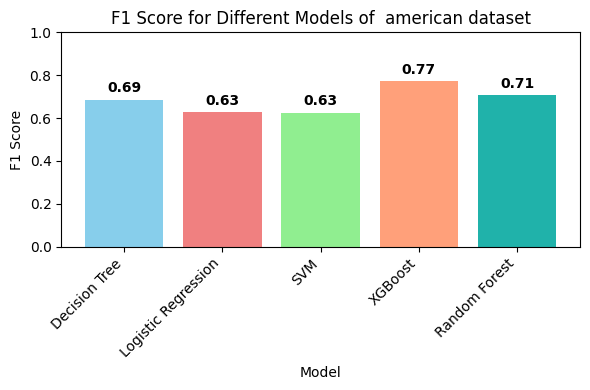

In [60]:
import matplotlib.pyplot as plt

# F1 scores for different models
model_names = ["Decision Tree", "Logistic Regression", "SVM", "XGBoost", "Random Forest"]
f1_scores = [dt_f1_score, lr_f1_score, svm_f1_score, xgboost_f1_score, rf_f1_score]

# Define custom colors for the bars
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']

# Create a bar plot for F1 scores
plt.figure(figsize=(6, 4))  # Set the figure size to make it smaller
plt.bar(model_names, f1_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Models of  american dataset')
plt.ylim(0, 1)  # Set the y-axis range (0 to 1)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability

# Add labels to the bars
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()


In [51]:
# with feature eengiineering
from pyspark.sql import SparkSession
from pyspark.ml.feature import StandardScaler
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import PCA
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.sql.functions import col
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initialize a Spark session
spark = SparkSession.builder.appName("taiwan_withfengg").getOrCreate()

# Load the CSV data 
df = spark.read.csv("american_resampled_data.csv", header=True, inferSchema=True)

# Selecting the features for scaling
feature_cols = [col_name for col_name in df.columns if col_name != 'status_label']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")  # Change outputCol name to "features"
df_assembled = assembler.transform(df)

# Initializing the StandardScaler
scaler = StandardScaler(inputCol="features", outputCol="scaled_features", withStd=True, withMean=False)

# Fit and transform the scaler
scaler_model = scaler.fit(df_assembled)
scaled_data = scaler_model.transform(df_assembled)

# Applying PCA
num_pca_components = 15
pca = PCA(k=num_pca_components, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(scaled_data)
X_pca = pca_model.transform(scaled_data).select("pca_features", "status_label")


train_data, test_data = X_pca.randomSplit([0.8, 0.2], seed=42)

# Initializing the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(featuresCol="pca_features", labelCol="status_label", maxDepth=5)

# Fitting the model
dt_model = dt_classifier.fit(train_data)

# Making predictions on the test data
predictions = dt_model.transform(test_data)

# Evaluating the model using F1 score
evaluator = MulticlassClassificationEvaluator(labelCol="status_label", predictionCol="prediction", metricName="f1")
dtf_f1_score = evaluator.evaluate(predictions)
print(f"F1 Score of Decision tree: {dtf_f1_score}")

F1 Score of Decision tree: 0.6591720293573886


In [52]:
# 2. logistic regression
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Initializing the Logistic Regression classifier
lr = LogisticRegression(featuresCol='pca_features', labelCol='status_label')
lr_model = lr.fit(train_data)
lr_predictions = lr_model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="status_label", predictionCol="prediction", metricName="f1")
lrf_f1_score = evaluator.evaluate(lr_predictions)

print("Logistic Regression F1 Score:", lrf_f1_score)



Logistic Regression F1 Score: 0.6253217778436024


In [53]:
# 3. SVM

from pyspark.ml.classification import LinearSVC
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Creating an instance of the LinearSVC model
svm = LinearSVC(featuresCol='pca_features', labelCol='status_label', maxIter=100)
svm_model = svm.fit(train_data)
svm_predictions = svm_model.transform(test_data)
evaluator = MulticlassClassificationEvaluator(labelCol="status_label", predictionCol="prediction", metricName="f1")
svmf_f1_score = evaluator.evaluate(svm_predictions)

print("SVM F1 Score:", svmf_f1_score)

SVM F1 Score: 0.6206287066120026


In [54]:
# 4. xg boost
from pyspark.ml.classification import LinearSVC, GBTClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

xgboost = GBTClassifier(featuresCol='pca_features', labelCol='status_label', maxDepth=5, maxIter=50)

# Fit the XGBoost model to the training data
xgboost_model = xgboost.fit(train_data)

# Making predictions on the test data using XGBoost
xgboost_predictions = xgboost_model.transform(test_data)

# Evaluating the XGBoost model
xgboostf_f1_score = evaluator.evaluate(xgboost_predictions)

print("XGBoost F1 Score:", xgboostf_f1_score)


XGBoost F1 Score: 0.7423041133570136


In [55]:
from pyspark.ml.classification import RandomForestClassifier

# RandomForestClassifier model
rf = RandomForestClassifier(featuresCol='pca_features', labelCol='status_label', numTrees=100, maxDepth=5)


rf_model = rf.fit(train_data)
rf_predictions = rf_model.transform(test_data)
rff_f1_score = evaluator.evaluate(rf_predictions)

print("Random Forest F1 Score:", rff_f1_score)

spark.stop()

Random Forest F1 Score: 0.6790283936764054


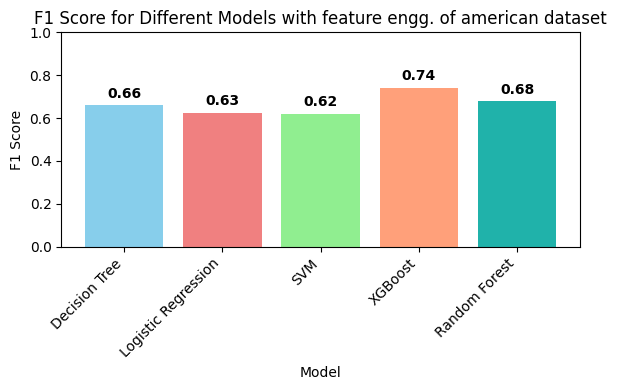

In [56]:
import matplotlib.pyplot as plt

# F1 scores for different models
model_names = ["Decision Tree", "Logistic Regression", "SVM", "XGBoost", "Random Forest"]
f1_scores = [dtf_f1_score, lrf_f1_score, svmf_f1_score, xgboostf_f1_score, rff_f1_score]

# Defining custom colors for the bars
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']

# Creating a bar plot for F1 scores
plt.figure(figsize=(6, 4))  # Set the figure size to make it smaller
plt.bar(model_names, f1_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Models with feature engg. of american dataset')
plt.ylim(0, 1)  # Set the y-axis range (0 to 1)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability

for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

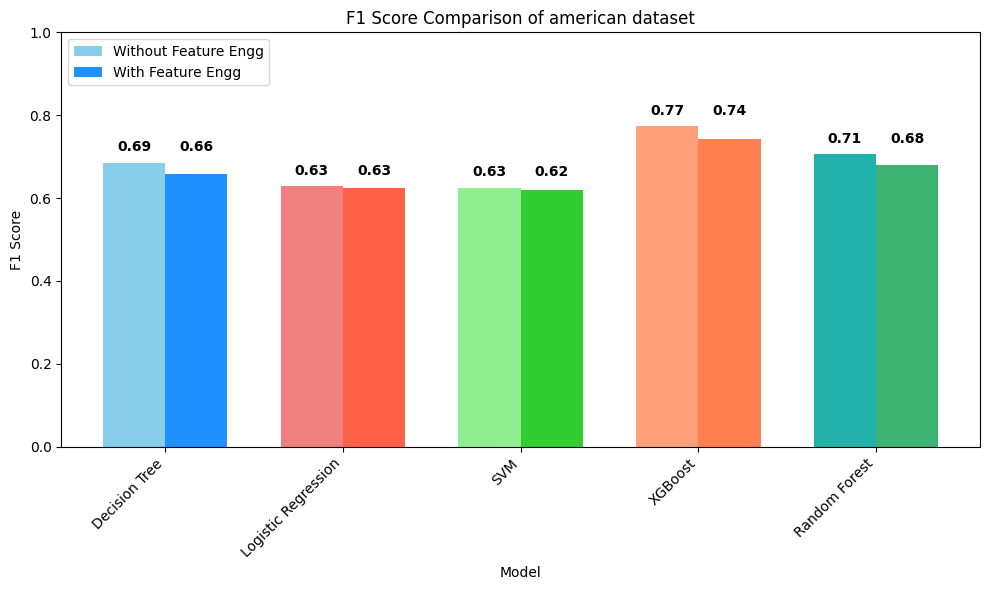

In [57]:
# percentage change graph of f1 score with feature engineering and without feature engg


import matplotlib.pyplot as plt
import numpy as np

# Model names
model_names = ["Decision Tree", "Logistic Regression", "SVM", "XGBoost", "Random Forest"]

# F1 scores without feature engineering
f1_scores_without_feature_engg = [dt_f1_score, lr_f1_score, svm_f1_score, xgboost_f1_score, rf_f1_score]

# F1 scores with feature engineering
f1_scores_with_feature_engg = [dtf_f1_score, lrf_f1_score, svmf_f1_score, xgboostf_f1_score, rff_f1_score]

# Define custom colors for bars
colors_without_feature_engg = ['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen']
colors_with_feature_engg = ['dodgerblue', 'tomato', 'limegreen', 'coral', 'mediumseagreen']

# Create x-axis positions for bars
x = np.arange(len(model_names))

# Set the width of the bars
bar_width = 0.35

# sized figure
plt.figure(figsize=(10, 6))

# bar plot for F1 scores with and without feature engineering
plt.bar(x - bar_width/2, f1_scores_without_feature_engg, bar_width, label='Without Feature Engg', color=colors_without_feature_engg)
plt.bar(x + bar_width/2, f1_scores_with_feature_engg, bar_width, label='With Feature Engg', color=colors_with_feature_engg)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison of american dataset')
plt.ylim(0, 1)  # Set the y-axis range (0 to 1)
plt.xticks(x, model_names, rotation=45, ha="right")  # Rotate x-axis labels for readability


for i, (v1, v2) in enumerate(zip(f1_scores_without_feature_engg, f1_scores_with_feature_engg)):
    plt.text(x[i] - bar_width/2, max(v1, v2) + 0.02, f"{v1:.2f}", ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')
    plt.text(x[i] + bar_width/2, max(v1, v2) + 0.02, f"{v2:.2f}", ha='center', va='bottom', color='black', fontsize=10, fontweight='bold')

# Add a legend
plt.legend(loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()



# size up and scale up and speed up

In [58]:
from pyspark.sql import SparkSession
from pyspark.ml.classification import DecisionTreeClassifier, RandomForestClassifier, GBTClassifier
from pyspark.ml.feature import VectorAssembler
import time


spark = SparkSession.builder.appName("metrics").getOrCreate()

abank_data = spark.read.csv("american_resampled_data.csv", header=True, inferSchema=True)

# Selecting features and target column
feature_cols = [col_name for col_name in abank_data.columns if col_name != 'status_label']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
abank_data = assembler.transform(abank_data).select("features", "status_label")

# Splitting the dataset
train_data, test_data = abank_data.randomSplit([0.8, 0.2], seed=42)

# Repartitioning the train_data and test_data into 4 partitions
train_data = train_data.repartition(4)
test_data = test_data.repartition(4)

# Initializing the parameters
m_values = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Dataset size factors

# Function to measure execution time
def measure_time(model, data):
    start_time = time.time()
    model.fit(data)
    end_time = time.time()
    return end_time - start_time

models = {
    "Decision Tree": DecisionTreeClassifier(featuresCol="features", labelCol="status_label"),
    "Random Forest": RandomForestClassifier(featuresCol="features", labelCol="status_label"),
    "XGBoost": GBTClassifier(featuresCol="features", labelCol="status_label")
}

for model_name, model in models.items():
    # Lists to store metrics
    sizeups = []
    speedups = []
    scaleups = []

    # Time for base dataset
    T1 = measure_time(model, train_data)
    base_count = train_data.count()

    for m in m_values:
        fraction = min(m * base_count / abank_data.count(), 1.0)  # Cap fraction to 1.0
        other_fraction = 1 - fraction
        subset_data, _ = abank_data.randomSplit([fraction, other_fraction], seed=42)

        # Maintain data in 4 partitions
        subset_data = subset_data.repartition(4)

        Tm = measure_time(model, subset_data)  # Time for m partitions

        # Calculate metrics
        sizeups.append(Tm / T1)
        speedups.append(T1 / Tm)
        scaleups.append((T1 / Tm) / m)

    # Print results
    print(f"--- {model_name} ---")
    print("Sizeups:", sizeups)
    print("Speedups:", speedups)
    print("Scaleups:", scaleups)
    print("\n")

spark.stop()






--- Decision Tree ---
Sizeups: [0.9175239564271437, 0.9059267426436641, 0.8509837450995239, 0.8411290892515629, 0.7490749287693477, 0.7329845878811067, 0.736170225009912, 0.7189746743385463, 0.7166522360061187]
Speedups: [1.0898897985116591, 1.1038420138496103, 1.175110577327242, 1.1888781553017034, 1.3349799353756187, 1.3642851657915136, 1.358381480297625, 1.390869575371338, 1.395376934247732]
Scaleups: [1.0898897985116591, 0.5519210069248052, 0.3917035257757473, 0.29721953882542584, 0.26699598707512373, 0.22738086096525226, 0.194054497185375, 0.17385869692141726, 0.15504188158308133]


--- Random Forest ---
Sizeups: [0.9765610205089865, 1.0385608621609943, 1.0498453185526293, 1.0396072736069248, 1.044813884138936, 1.0532236817310532, 1.045060229207258, 1.0639436362951127, 1.0292653675703896]
Speedups: [1.0240015513611191, 0.9628708691363946, 0.9525212736850144, 0.9619016963304738, 0.9571082612709836, 0.9494659276521621, 0.9568826485326698, 0.9398994137341912, 0.971566742171194]
Scale

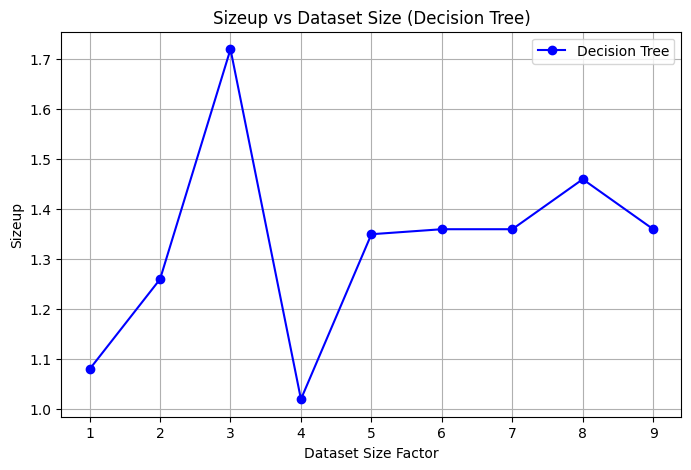

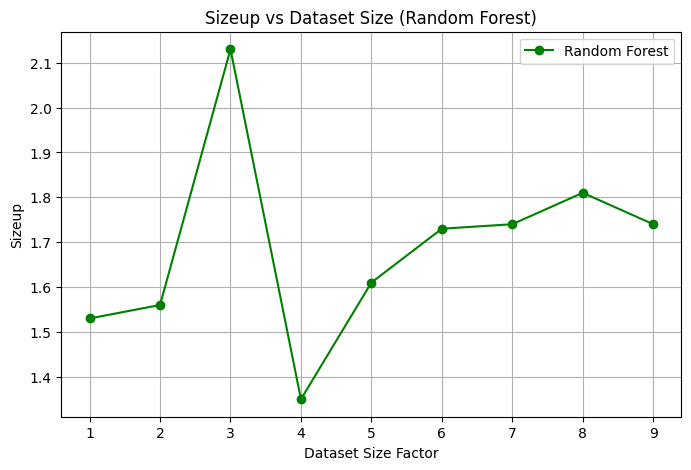

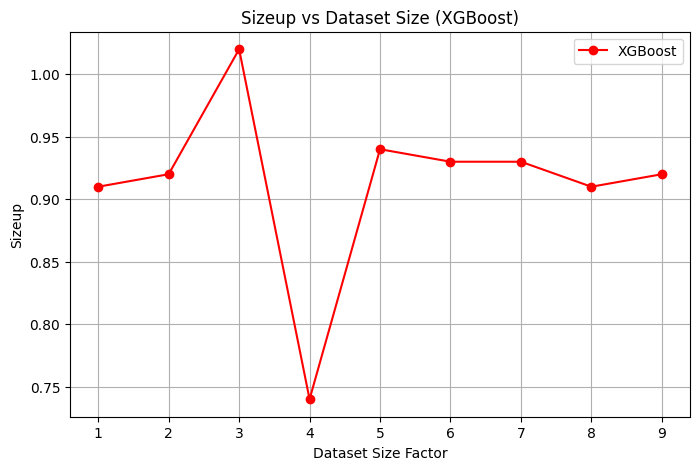

In [59]:
# plotting graph for size up metrics
import matplotlib.pyplot as plt


# Arrays for sizeup metrics for Decision Tree, Random Forest, and XGBoost
sizeups_dt = [1.08, 1.26, 1.72, 1.02, 1.35, 1.36, 1.36, 1.46, 1.36]
sizeups_rf = [1.53, 1.56, 2.13, 1.35, 1.61, 1.73, 1.74, 1.81, 1.74]  
sizeups_xgb = [0.91, 0.92, 1.02, 0.74, 0.94, 0.93, 0.93, 0.91, 0.92] 

# sizeup metrics for Decision Tree
plt.figure(figsize=(8, 5))
plt.plot(m_values, sizeups_dt, marker='o', linestyle='-', color='blue', label='Decision Tree')
plt.xlabel('Dataset Size Factor')
plt.ylabel('Sizeup')
plt.title('Sizeup vs Dataset Size (Decision Tree)')
plt.xticks(m_values)
plt.grid()
plt.legend()
plt.show()

# sizeup metrics for Random Forest
plt.figure(figsize=(8, 5))
plt.plot(m_values, sizeups_rf, marker='o', linestyle='-', color='green', label='Random Forest')
plt.xlabel('Dataset Size Factor')
plt.ylabel('Sizeup')
plt.title('Sizeup vs Dataset Size (Random Forest)')
plt.xticks(m_values)
plt.grid()
plt.legend()
plt.show()

# sizeup metrics for XGBoost
plt.figure(figsize=(8, 5))
plt.plot(m_values, sizeups_xgb, marker='o', linestyle='-', color='red', label='XGBoost')
plt.xlabel('Dataset Size Factor')
plt.ylabel('Sizeup')
plt.title('Sizeup vs Dataset Size (XGBoost)')
plt.xticks(m_values)
plt.grid()
plt.legend()
plt.show()


# References:
1. https://www.kaggle.com/code/marto24/bankruptcy-detection
2. https://www.sciencedirect.com/science/article/pii/S1877050917327345

# END